# **BASIC INFO**
This is the CORGIS dataset for counties. We will be checking economic health (class, such as low income, medium income, and high income) using certain data, such as the education percentages, demographics, number of firms, and more.

Dataset is downloaded from https://corgis-edu.github.io/corgis/csv/county_demographics/

# **HOW TO RUN**
Run cells from the top cell down.

=== ECONOMIC HEALTH CLASSIFICATION PROJECT ===
Predicting county economic health (Low/Middle/High Income) based on demographics and education
Loading County Demographics Dataset from GitHub...
✅ Successfully loaded 3139 county records
✅ Dataset shape: (3139, 43)

=== PREPARING ECONOMIC HEALTH CLASSIFICATION ===
Removed 0 records with missing income data
Final dataset: 3139 counties

✅ Created Economic Health Classification Target
Classification based on: Income.Median Houseold Income
Distribution:
  • Low_Income: 2489 counties (79.3%)
  • Middle_Income: 621 counties (19.8%)
  • High_Income: 29 counties (0.9%)

=== FEATURE VARIABLES FOR PREDICTION ===
Education: 2 variables
  Example: Education.Bachelor's Degree or Higher
Demographics: 8 variables
  Example: Age.Percent 65 and Older
Employment: 8 variables
  Example: Employment.Nonemployer Establishments
Housing: 5 variables
  Example: Housing.Homeownership Rate

=== ECONOMIC HEALTH DISTRIBUTION ===


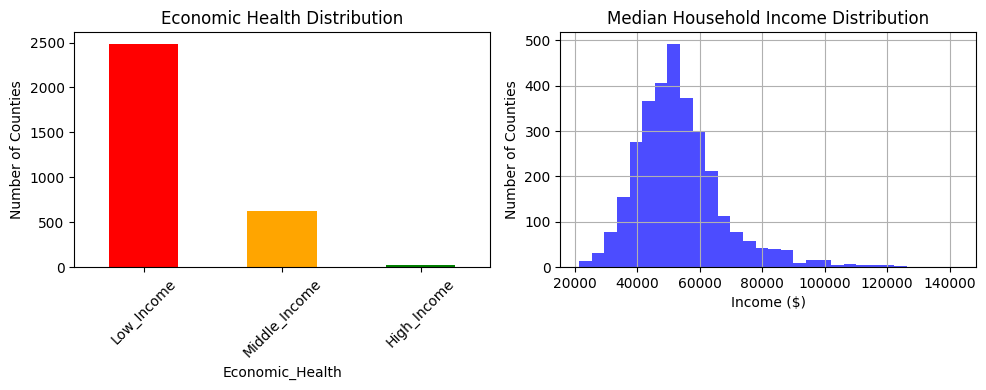


=== DATASET READY FOR CLASSIFICATION ===
📊 Classification Problem: Economic Health Prediction
   • Target: Economic_Health (Low/Middle/High Income)
   • Records: 3139 U.S. counties
   • Features: Demographics, Education, Employment, Housing
   • Source: U.S. Census Bureau via GitHub

🎯 Classification Target Distribution:
   • Low_Income: $21,504 - $61,763 (avg: $48,021)
   • Middle_Income: $61,772 - $101,496 (avg: $72,515)
   • High_Income: $102,152 - $142,299 (avg: $114,334)

=== SAMPLE DATA ===
             County State  Income.Median Houseold Income Economic_Health
0  Abbeville County    SC                          38741      Low_Income
1     Acadia Parish    LA                          43396      Low_Income
2   Accomack County    VA                          46073      Low_Income
3        Ada County    ID                          66293   Middle_Income
4      Adair County    IA                          53363      Low_Income


/tmp/ipython-input-1090117267.py:121: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_ranges = df.groupby('Economic_Health')[income_col].agg(['min', 'max', 'mean']).round(0)


In [ ]:
# ================================================================
# ECONOMIC HEALTH CLASSIFICATION PROJECT - DATA LOADING
# County Demographics Dataset from GitHub Repository
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)

print("=== ECONOMIC HEALTH CLASSIFICATION PROJECT ===")
print("Predicting county economic health (Low/Middle/High Income) based on demographics and education")
print("Loading County Demographics Dataset from GitHub...")

# ================================================================
# 1. LOAD DATA FROM GITHUB
# ================================================================

github_url = "https://raw.githubusercontent.com/dilgc/AIM460GroupProject2/main/county_demographics.csv"

try:
    df = pd.read_csv(github_url)
    print(f"✅ Successfully loaded {len(df)} county records")
    print(f"✅ Dataset shape: {df.shape}")

except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    exit()

# ================================================================
# 2. PREPARE DATA FOR ECONOMIC HEALTH CLASSIFICATION
# ================================================================

print(f"\n=== PREPARING ECONOMIC HEALTH CLASSIFICATION ===")

# Check if income column exists
income_col = 'Income.Median Houseold Income'
if income_col not in df.columns:
    print(f"❌ Income column not found. Available columns:")
    print([col for col in df.columns if 'income' in col.lower()])
    exit()

# Remove records with missing income data
initial_count = len(df)
df = df[df[income_col] != -1].copy()
print(f"Removed {initial_count - len(df)} records with missing income data")
print(f"Final dataset: {len(df)} counties")

# Create Economic Health classification target
df['Economic_Health'] = pd.cut(df[income_col],
                              bins=3,
                              labels=['Low_Income', 'Middle_Income', 'High_Income'])

print(f"\n✅ Created Economic Health Classification Target")
print(f"Classification based on: {income_col}")
print(f"Distribution:")
for category, count in df['Economic_Health'].value_counts().sort_index().items():
    percentage = (count / len(df)) * 100
    print(f"  • {category}: {count} counties ({percentage:.1f}%)")

# ================================================================
# 3. IDENTIFY FEATURE VARIABLES
# ================================================================

print(f"\n=== FEATURE VARIABLES FOR PREDICTION ===")

# Key demographics and education variables for predicting economic health
feature_categories = {
    'Education': [col for col in df.columns if 'education' in col.lower() or 'bachelor' in col.lower() or 'school' in col.lower()],
    'Demographics': [col for col in df.columns if any(x in col.lower() for x in ['age', 'percent', 'ethnicity', 'population'])],
    'Employment': [col for col in df.columns if 'employment' in col.lower() or 'firm' in col.lower()],
    'Housing': [col for col in df.columns if 'housing' in col.lower() or 'homeownership' in col.lower()]
}

for category, cols in feature_categories.items():
    if cols:
        print(f"{category}: {len(cols)} variables")
        print(f"  Example: {cols[0]}")

# ================================================================
# 4. BASIC VISUALIZATION OF TARGET VARIABLE
# ================================================================

print(f"\n=== ECONOMIC HEALTH DISTRIBUTION ===")

# Quick visualization
plt.figure(figsize=(10, 4))

# Plot 1: Economic Health Distribution
plt.subplot(1, 2, 1)
df['Economic_Health'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Economic Health Distribution')
plt.ylabel('Number of Counties')
plt.xticks(rotation=45)

# Plot 2: Income Distribution
plt.subplot(1, 2, 2)
df[income_col].hist(bins=30, alpha=0.7, color='blue')
plt.title('Median Household Income Distribution')
plt.xlabel('Income ($)')
plt.ylabel('Number of Counties')

plt.tight_layout()
plt.show()

# ================================================================
# 5. DATASET SUMMARY
# ================================================================

print(f"\n=== DATASET READY FOR CLASSIFICATION ===")
print(f"📊 Classification Problem: Economic Health Prediction")
print(f"   • Target: Economic_Health (Low/Middle/High Income)")
print(f"   • Records: {len(df)} U.S. counties")
print(f"   • Features: Demographics, Education, Employment, Housing")
print(f"   • Source: U.S. Census Bureau via GitHub")

print(f"\n🎯 Classification Target Distribution:")
income_ranges = df.groupby('Economic_Health')[income_col].agg(['min', 'max', 'mean']).round(0)
for category in income_ranges.index:
    min_inc, max_inc, mean_inc = income_ranges.loc[category]
    print(f"   • {category}: ${min_inc:,.0f} - ${max_inc:,.0f} (avg: ${mean_inc:,.0f})")

# Show sample data
print(f"\n=== SAMPLE DATA ===")
sample_cols = ['County', 'State', income_col, 'Economic_Health']
available_sample_cols = [col for col in sample_cols if col in df.columns]
print(df[available_sample_cols].head())

High income seems very rare. Low income seems by far the most common. We will need to address this class imbalance down the line, likely with SMOTE or another option.

*Note: Down the line, when we were focused on rebalancing the class, we actually combined medium income and high income into one "higher income" column, due to the sheer lack of high income values as shown in this graph.*

Let's check for missing values.

In [ ]:
# ================================================================
# MISSING VALUES CHECK
# ================================================================

print("=== MISSING VALUES ANALYSIS ===")

# 1. Standard missing values
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

if len(missing_cols) > 0:
    print(f"Columns with missing values:")
    for col, count in missing_cols.items():
        pct = (count / len(df)) * 100
        print(f"  {col}: {count} ({pct:.1f}%)")
else:
    print("✅ No standard missing values found")

# 2. Check for -1 values (common encoding for missing)
print(f"\nChecking for -1 encoded missing values:")
neg_one_counts = (df.select_dtypes(include=[np.number]) == -1).sum()
neg_one_cols = neg_one_counts[neg_one_counts > 0]

if len(neg_one_cols) > 0:
    print(f"Columns with -1 values:")
    for col, count in neg_one_cols.items():
        pct = (count / len(df)) * 100
        print(f"  {col}: {count} ({pct:.1f}%)")
else:
    print("✅ No -1 encoded missing values found")

# 3. Overall completeness
total_missing = df.isnull().sum().sum() + neg_one_cols.sum()
total_cells = len(df) * len(df.columns)
completeness = (1 - total_missing / total_cells) * 100

print(f"\nDataset completeness: {completeness:.1f}%")

=== MISSING VALUES ANALYSIS ===
✅ No standard missing values found

Checking for -1 encoded missing values:
Columns with -1 values:
  Age.Percent Under 18 Years: 1 (0.0%)
  Age.Percent Under 5 Years: 1 (0.0%)
  Employment.Nonemployer Establishments: 41 (1.3%)
  Ethnicities.American Indian and Alaska Native Alone: 2 (0.1%)
  Ethnicities.Asian Alone: 7 (0.2%)
  Ethnicities.Black Alone: 8 (0.3%)
  Ethnicities.Native Hawaiian and Other Pacific Islander Alone: 204 (6.5%)
  Ethnicities.Two or More Races: 2 (0.1%)
  Housing.Homeownership Rate: 1 (0.0%)
  Housing.Housing Units: 40 (1.3%)
  Housing.Median Value of Owner-Occupied Units: 2 (0.1%)
  Miscellaneous.Manufacturers Shipments: 1194 (38.0%)
  Miscellaneous.Mean Travel Time to Work: 1 (0.0%)
  Miscellaneous.Veterans: 1 (0.0%)
  Sales.Accommodation and Food Services Sales: 688 (21.9%)
  Sales.Retail Sales: 60 (1.9%)

Dataset completeness: 98.4%


Manufacturers Shipments and Accomodation and Food Services are missing an awful lot, too much to reliably impute. We have an abundance of features, and we will likely filter out a lot later. Therefore, we have decided to remove these problem features entirely, rather than attempting to deal with them.

For the others, we will impute with the median. Since they're fairly insignificant, this will be unlikely to do any harm to the data.

In [ ]:
# ================================================================
# HANDLE MISSING VALUES
# ================================================================

print("=== HANDLING MISSING VALUES ===")

# Remove columns with high missing rates (>20%)
high_missing_cols = ['Miscellaneous.Manufacturers Shipments', 'Sales.Accommodation and Food Services Sales']
print(f"Removing {len(high_missing_cols)} columns with high missing rates:")
for col in high_missing_cols:
    print(f"  • {col}")

df = df.drop(high_missing_cols, axis=1)

# Handle remaining -1 values by replacing with median
print(f"\nImputing remaining -1 values with median:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputed_count = 0

for col in numeric_cols:
    if col != 'Economic_Health':  # Don't touch target variable
        mask = df[col] == -1
        if mask.any():
            median_val = df[df[col] != -1][col].median()
            df.loc[mask, col] = median_val
            imputed_count += mask.sum()
            print(f"  • {col}: {mask.sum()} values → {median_val}")

print(f"\nTotal imputed values: {imputed_count}")
print(f"Final dataset: {len(df)} counties, {len(df.columns)} features")
print("✅ Missing values handled - dataset ready for analysis")

=== HANDLING MISSING VALUES ===
Removing 2 columns with high missing rates:
  • Miscellaneous.Manufacturers Shipments
  • Sales.Accommodation and Food Services Sales

Imputing remaining -1 values with median:
  • Age.Percent Under 18 Years: 1 values → 21.9
  • Age.Percent Under 5 Years: 1 values → 5.7
  • Employment.Nonemployer Establishments: 41 values → 1705.0
  • Ethnicities.American Indian and Alaska Native Alone: 2 values → 0.7
  • Ethnicities.Asian Alone: 7 values → 0.8
  • Ethnicities.Black Alone: 8 values → 2.6
  • Ethnicities.Native Hawaiian and Other Pacific Islander Alone: 204 values → 0.1
  • Ethnicities.Two or More Races: 2 values → 1.8
  • Housing.Homeownership Rate: 1 values → 72.9
  • Housing.Housing Units: 40 values → 12632.0
  • Housing.Median Value of Owner-Occupied Units: 2 values → 127900.0
  • Miscellaneous.Mean Travel Time to Work: 1 values → 23.7
  • Miscellaneous.Veterans: 1 values → 1695.0
  • Sales.Retail Sales: 60 values → 275248.0

Total imputed values: 371

Good, we imputed 371 values. Our data should no longer be missing any values, and we dealt with anything recorded as -1 earlier.

It's time to look at the histograms. It's important to understand the quirks of our data so we can make any necessary transformations or other considerations.

=== FEATURE DISTRIBUTIONS BY ECONOMIC HEALTH CLASS ===
Creating class-conditional histograms for 39 features


/tmp/ipython-input-823356241.py:41: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


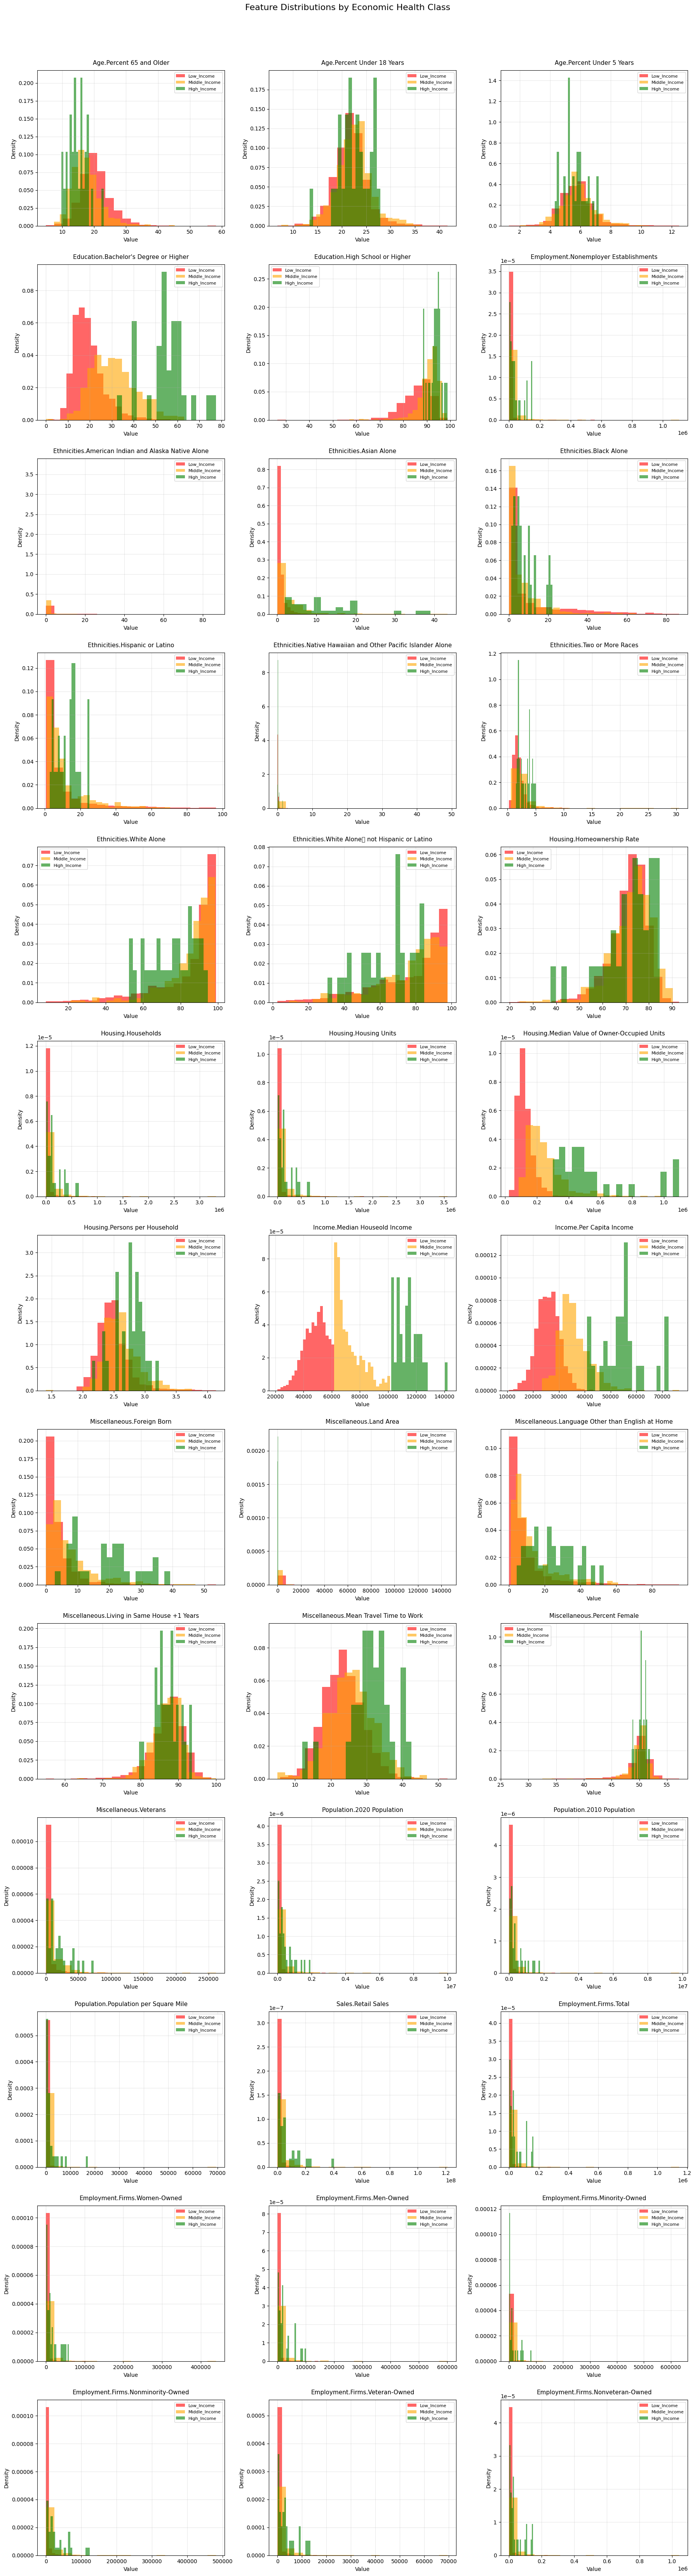

In [ ]:
# ================================================================
# CLASS-CONDITIONAL HISTOGRAMS
# ================================================================

print("=== FEATURE DISTRIBUTIONS BY ECONOMIC HEALTH CLASS ===")

# Get numeric columns (excluding target variable)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Economic_Health' in numeric_cols:
    numeric_cols.remove('Economic_Health')

print(f"Creating class-conditional histograms for {len(numeric_cols)} features")

# Calculate grid size
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create figure
plt.figure(figsize=(18, 5 * n_rows))

# Colors for each class
colors = {'Low_Income': 'red', 'Middle_Income': 'orange', 'High_Income': 'green'}
alpha = 0.6

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    # Create overlapping histograms for each class
    for class_label in ['Low_Income', 'Middle_Income', 'High_Income']:
        class_data = df[df['Economic_Health'] == class_label][col]
        plt.hist(class_data, bins=20, alpha=alpha,
                label=class_label, color=colors[class_label],
                density=True)  # Use density for better comparison

    plt.title(f'{col}', fontsize=11, pad=10)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Feature Distributions by Economic Health Class', fontsize=16, y=1.02)
plt.show()

A lot are too indicative, which removes the entire point of predicting, such as "income." Obviously, anywhere the income is past a certain threshold will be medium income, or high income. We will remove those, as well as any other problematic features. We've determined anything labeled "Miscellaneous" can go as well. We have too many dimensions as is. We will more consciously decide what features to remove later.

In [ ]:
# ================================================================
# REMOVE PROBLEMATIC FEATURES
# ================================================================

print("=== REMOVING PROBLEMATIC FEATURES ===")

# Get current columns
print(f"Starting columns: {len(df.columns)}")

# Define patterns to remove (data leakage and problematic features)
remove_patterns = [
    'Income.',           # All income-related features
    'Sales.',           # Economic activity (could be leakage)
    'Miscellaneous.',   # Often unreliable/sparse data
]

# Find columns to remove
columns_to_remove = []
for col in df.columns:
    for pattern in remove_patterns:
        if col.startswith(pattern):
            columns_to_remove.append(col)
            break

# Don't remove target variable
if 'Economic_Health' in columns_to_remove:
    columns_to_remove.remove('Economic_Health')

print(f"Removing {len(columns_to_remove)} columns:")
for col in columns_to_remove:
    print(f"  • {col}")

# Remove the columns
df_clean = df.drop(columns_to_remove, axis=1)

print(f"\nFinal dataset: {len(df_clean)} counties, {len(df_clean.columns)} features")
print(f"Remaining feature categories:")

# Show remaining feature categories
remaining_prefixes = set([col.split('.')[0] for col in df_clean.columns if '.' in col])
for prefix in sorted(remaining_prefixes):
    count = len([col for col in df_clean.columns if col.startswith(prefix + '.')])
    print(f"  • {prefix}: {count} features")

print("\n✅ Clean dataset ready for modeling")

# Update df to the cleaned version
df = df_clean

=== REMOVING PROBLEMATIC FEATURES ===
Starting columns: 42
Removing 10 columns:
  • Income.Median Houseold Income
  • Income.Per Capita Income
  • Miscellaneous.Foreign Born
  • Miscellaneous.Land Area
  • Miscellaneous.Language Other than English at Home
  • Miscellaneous.Living in Same House +1 Years
  • Miscellaneous.Mean Travel Time to Work
  • Miscellaneous.Percent Female
  • Miscellaneous.Veterans
  • Sales.Retail Sales

Final dataset: 3139 counties, 32 features
Remaining feature categories:
  • Age: 3 features
  • Education: 2 features
  • Employment: 8 features
  • Ethnicities: 8 features
  • Housing: 5 features
  • Population: 3 features

✅ Clean dataset ready for modeling


32 features is still too expansive. Let's remove some of the less necessary ones, through a feature selection analysis. We will use a consensus to determine which features to keep. It will be a consensus between F-statistic, mutual information rankings, and random forest feature importance.

In [ ]:
# ================================================================
# FEATURE SELECTION ANALYSIS
# ================================================================

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

print("=== FEATURE SELECTION ANALYSIS ===")

# Prepare data - only keep numeric columns
X = df.select_dtypes(include=[np.number]).drop(['Economic_Health'], axis=1, errors='ignore')
# Encode target variable for sklearn
le = LabelEncoder()
y = le.fit_transform(df['Economic_Health'])

print(f"Analyzing {len(X.columns)} numeric features for importance")
print(f"Excluded columns: {[col for col in df.columns if col not in X.columns and col != 'Economic_Health']}")

# ================================================================
# 1. STATISTICAL TESTS (F-statistic)
# ================================================================

print("\n1. F-Statistic Rankings (ANOVA F-test):")
f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(X, y)

f_scores = pd.DataFrame({
    'feature': X.columns,
    'f_score': f_selector.scores_
}).sort_values('f_score', ascending=False)

print("Top 10 features by F-statistic:")
for i, (_, row) in enumerate(f_scores.head(10).iterrows()):
    print(f"  {i+1:2d}. {row['feature']:<40} {row['f_score']:8.2f}")

# ================================================================
# 2. MUTUAL INFORMATION
# ================================================================

print("\n2. Mutual Information Rankings:")
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)

mi_scores = pd.DataFrame({
    'feature': X.columns,
    'mi_score': mi_selector.scores_
}).sort_values('mi_score', ascending=False)

print("Top 10 features by Mutual Information:")
for i, (_, row) in enumerate(mi_scores.head(10).iterrows()):
    print(f"  {i+1:2d}. {row['feature']:<40} {row['mi_score']:8.3f}")

# ================================================================
# 3. RANDOM FOREST IMPORTANCE
# ================================================================

print("\n3. Random Forest Feature Importance:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 features by Random Forest:")
for i, (_, row) in enumerate(rf_importance.head(10).iterrows()):
    print(f"  {i+1:2d}. {row['feature']:<40} {row['importance']:8.3f}")

# ================================================================
# 4. CONSENSUS RANKING
# ================================================================

print("\n4. Consensus Top Features:")

# Normalize scores to 0-1 range for fair comparison
f_scores['f_norm'] = f_scores['f_score'] / f_scores['f_score'].max()
mi_scores['mi_norm'] = mi_scores['mi_score'] / mi_scores['mi_score'].max()
rf_importance['rf_norm'] = rf_importance['importance'] / rf_importance['importance'].max()

# Merge all scores
consensus = f_scores[['feature', 'f_norm']].merge(
    mi_scores[['feature', 'mi_norm']], on='feature'
).merge(
    rf_importance[['feature', 'rf_norm']], on='feature'
)

# Calculate average rank
consensus['avg_score'] = (consensus['f_norm'] + consensus['mi_norm'] + consensus['rf_norm']) / 3
consensus = consensus.sort_values('avg_score', ascending=False)

print("Top 10 features by consensus ranking:")
for i, (_, row) in enumerate(consensus.head(10).iterrows()):
    print(f"  {i+1:2d}. {row['feature']:<40} {row['avg_score']:8.3f}")

# ================================================================
# 5. RECOMMENDED FEATURE SET
# ================================================================

print(f"\n=== RECOMMENDED FEATURE SET (TOP 8) ===")
top_features = consensus.head(8)['feature'].tolist()

for i, feature in enumerate(top_features):
    print(f"  {i+1}. {feature}")

print(f"\n💡 These 8 features show consistent high importance across all methods")
print(f"   They should provide good predictive power while keeping model interpretable")

# Store top features for use
top_8_features = top_features

=== FEATURE SELECTION ANALYSIS ===
Analyzing 29 numeric features for importance
Excluded columns: ['County', 'State']

1. F-Statistic Rankings (ANOVA F-test):
Top 10 features by F-statistic:
   1. Housing.Median Value of Owner-Occupied Units  1182.68
   2. Education.Bachelor's Degree or Higher      847.29
   3. Ethnicities.Asian Alone                    442.07
   4. Education.High School or Higher            200.05
   5. Employment.Firms.Nonminority-Owned         147.15
   6. Age.Percent 65 and Older                   115.80
   7. Employment.Firms.Veteran-Owned             108.03
   8. Population.2020 Population                 100.52
   9. Housing.Households                          99.60
  10. Housing.Housing Units                       94.90

2. Mutual Information Rankings:
Top 10 features by Mutual Information:
   1. Housing.Median Value of Owner-Occupied Units    0.212
   2. Education.Bachelor's Degree or Higher       0.166
   3. Ethnicities.Asian Alone                     0.097
 

Now we know our top 8 most correlating features. Let's restrict the data down to them. We will likely end up further lowering the amount of features in the future, through combining features that suffer from multicolinearity but may still have unique input for the model, a common way of handling multicolinearity.

In [ ]:
# ================================================================
# KEEP ONLY TOP 8 FEATURES
# ================================================================

print("=== FINALIZING FEATURE SET ===")

# Define the final feature set
final_features = [
    'Housing.Median Value of Owner-Occupied Units',
    'Education.Bachelor\'s Degree or Higher',
    'Ethnicities.Asian Alone',
    'Education.High School or Higher',
    'Employment.Nonemployer Establishments',
    'Employment.Firms.Nonminority-Owned',
    'Employment.Firms.Total',
    'Age.Percent 65 and Older',
    'Economic_Health'  # Keep target variable
]

# Also keep identifier columns if they exist
identifier_cols = []
for col in ['County', 'State']:
    if col in df.columns:
        identifier_cols.append(col)

all_cols_to_keep = identifier_cols + final_features

print(f"Keeping {len(final_features)} features + {len(identifier_cols)} identifier columns")
print("Final features:")
for i, feature in enumerate(final_features[:-1], 1):  # Exclude target from numbering
    print(f"  {i}. {feature}")

# Filter dataset
df_final = df[all_cols_to_keep].copy()

print(f"\nFinal dataset: {len(df_final)} counties, {len(df_final.columns)} total columns")
print("✅ Feature selection complete - ready for preprocessing!")

# Update df
df = df_final

=== FINALIZING FEATURE SET ===
Keeping 9 features + 2 identifier columns
Final features:
  1. Housing.Median Value of Owner-Occupied Units
  2. Education.Bachelor's Degree or Higher
  3. Ethnicities.Asian Alone
  4. Education.High School or Higher
  5. Employment.Nonemployer Establishments
  6. Employment.Firms.Nonminority-Owned
  7. Employment.Firms.Total
  8. Age.Percent 65 and Older

Final dataset: 3139 counties, 11 total columns
✅ Feature selection complete - ready for preprocessing!


Now we are left with the 8 features, plus the target feature. Let's view the histograms of these leftover features to fix any quirks with transformations.

=== FINAL 8 FEATURES - CLASS HISTOGRAMS ===


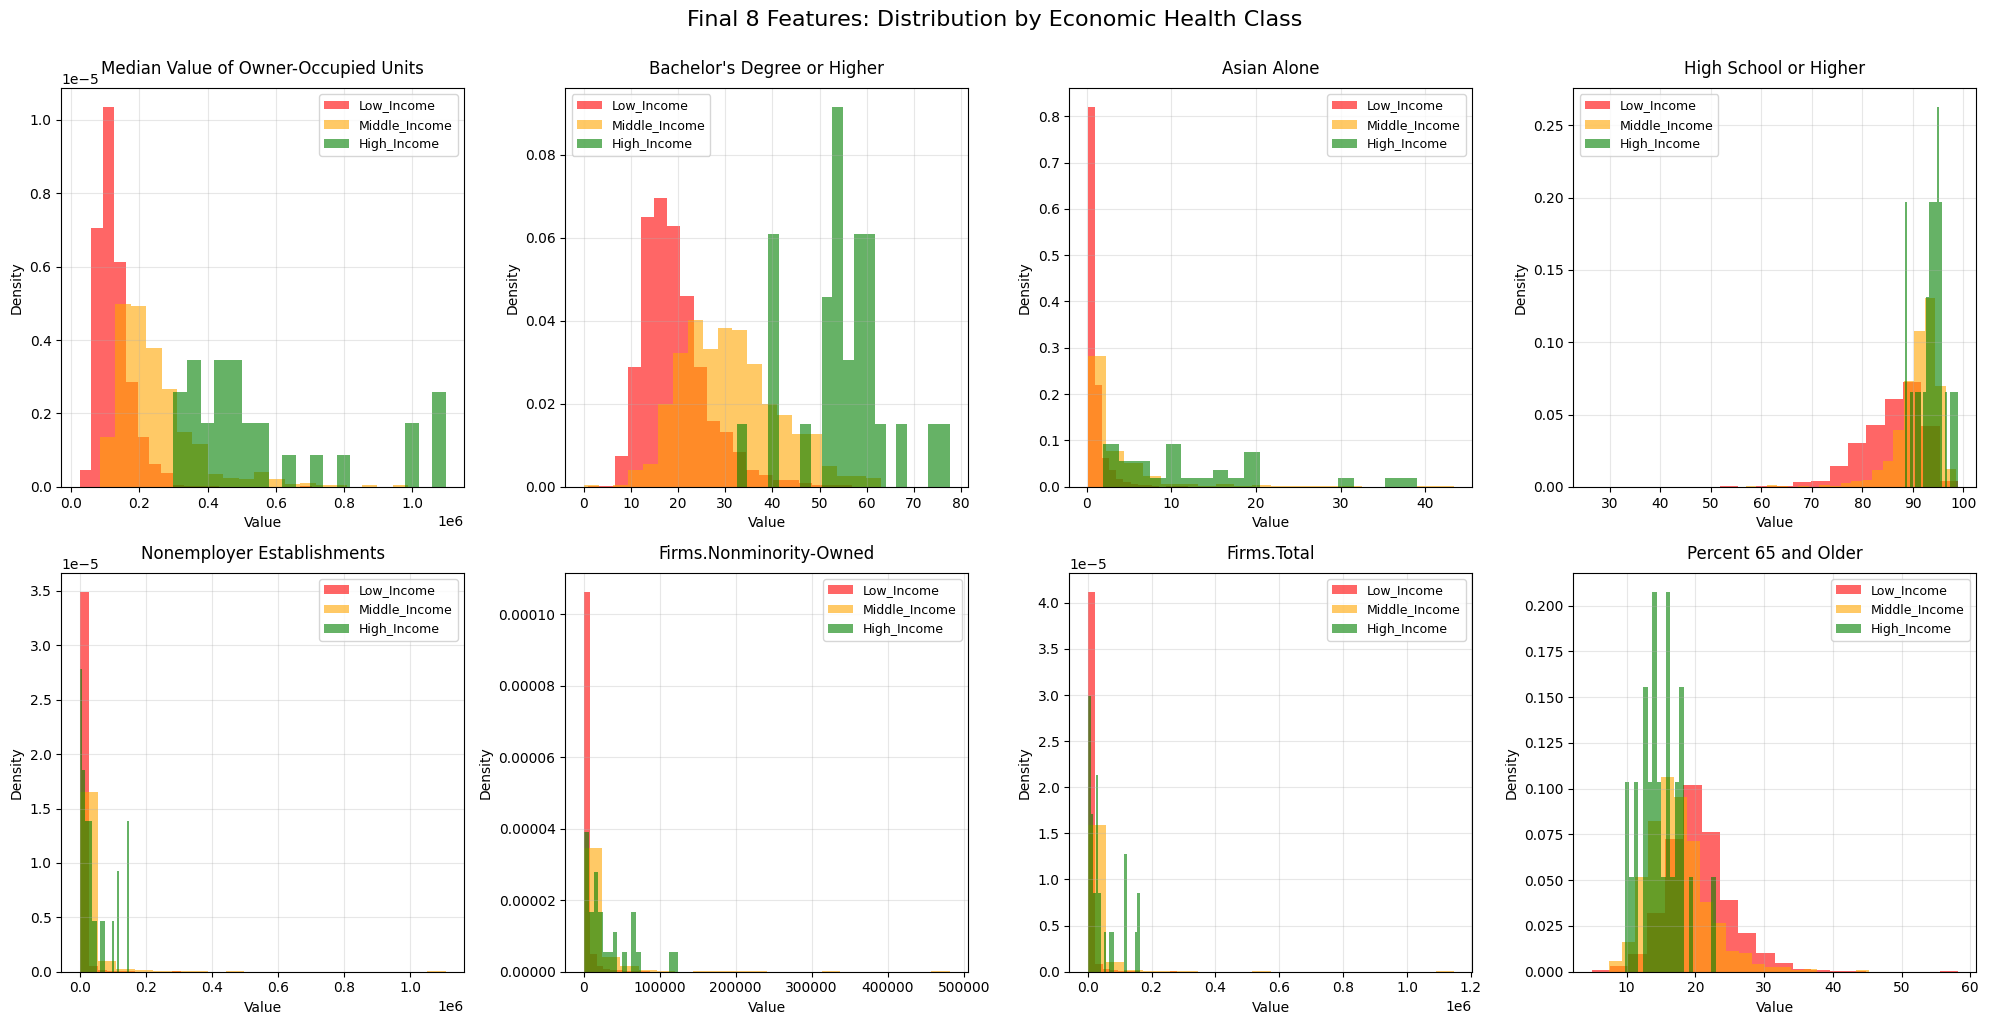


=== CLASS SEPARATION ANALYSIS ===
Median Value of Owner-Occupied Units | Low: 125656.6 | High: 563517.2 | Ratio: 4.48
Bachelor's Degree or Higher         | Low:     19.3 | High:     54.8 | Ratio: 2.84
Asian Alone                         | Low:      1.0 | High:     12.5 | Ratio: 12.20
High School or Higher               | Low:     85.9 | High:     93.7 | Ratio: 1.09
Nonemployer Establishments          | Low:   4779.5 | High:  45844.9 | Ratio: 9.59
Nonminority-Owned                   | Low:   3586.7 | High:  31151.6 | Ratio: 8.69
Total                               | Low:   5273.6 | High:  47728.0 | Ratio: 9.05
Percent 65 and Older                | Low:     20.4 | High:     14.9 | Ratio: 0.73

💡 Features with ratio >2.0 show strong class separation
💡 Features with ratio ~1.0 show poor class separation


/tmp/ipython-input-4277740817.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Economic_Health')[col].mean()


In [ ]:
# ================================================================
# HISTOGRAMS OF FINAL 8 FEATURES BY CLASS
# ================================================================

print("=== FINAL 8 FEATURES - CLASS HISTOGRAMS ===")

# Get the 8 numeric features (excluding identifiers and target)
feature_cols = [
    'Housing.Median Value of Owner-Occupied Units',
    'Education.Bachelor\'s Degree or Higher',
    'Ethnicities.Asian Alone',
    'Education.High School or Higher',
    'Employment.Nonemployer Establishments',
    'Employment.Firms.Nonminority-Owned',
    'Employment.Firms.Total',
    'Age.Percent 65 and Older'
]

# Create figure with 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Colors for each class
colors = {'Low_Income': 'red', 'Middle_Income': 'orange', 'High_Income': 'green'}
alpha = 0.6

for i, col in enumerate(feature_cols):
    ax = axes[i]

    # Create overlapping histograms for each class
    for class_label in ['Low_Income', 'Middle_Income', 'High_Income']:
        class_data = df[df['Economic_Health'] == class_label][col]
        ax.hist(class_data, bins=20, alpha=alpha,
                label=class_label, color=colors[class_label],
                density=True)

    # Clean up the feature name for title
    clean_title = col.replace('Housing.', '').replace('Education.', '').replace('Ethnicities.', '').replace('Employment.', '').replace('Age.', '')
    ax.set_title(clean_title, fontsize=12, pad=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Final 8 Features: Distribution by Economic Health Class', fontsize=16, y=1.02)
plt.show()

# Print class separation insights
print(f"\n=== CLASS SEPARATION ANALYSIS ===")
for col in feature_cols:
    # Calculate means for each class
    means = df.groupby('Economic_Health')[col].mean()
    low_mean = means['Low_Income']
    high_mean = means['High_Income']

    # Calculate separation (ratio of high to low income means)
    separation = high_mean / low_mean if low_mean != 0 else float('inf')

    clean_name = col.split('.')[-1]
    print(f"{clean_name:<35} | Low: {low_mean:8.1f} | High: {high_mean:8.1f} | Ratio: {separation:.2f}")

print(f"\n💡 Features with ratio >2.0 show strong class separation")
print(f"💡 Features with ratio ~1.0 show poor class separation")

Some of these features need to be transformed a bit. Let's work on that. Let's apply log functions to any features that are shifted to the right.

In [ ]:
# ================================================================
# FEATURE TRANSFORMATIONS
# ================================================================

import numpy as np

print("=== APPLYING FEATURE TRANSFORMATIONS ===")

# Log transformations for right-skewed features
skewed_features = [
    'Housing.Median Value of Owner-Occupied Units',
    'Employment.Nonemployer Establishments',
    'Employment.Firms.Nonminority-Owned',
    'Employment.Firms.Total',
    'Ethnicities.Asian Alone'
]

for feature in skewed_features:
    original_name = feature
    new_name = f"{feature}_log"

    # Use log(x+1) to handle zeros
    df[new_name] = np.log1p(df[feature])
    print(f"✅ {original_name} → {new_name}")

print(f"\n{len(skewed_features)} features transformed")

=== APPLYING FEATURE TRANSFORMATIONS ===
✅ Housing.Median Value of Owner-Occupied Units → Housing.Median Value of Owner-Occupied Units_log
✅ Employment.Nonemployer Establishments → Employment.Nonemployer Establishments_log
✅ Employment.Firms.Nonminority-Owned → Employment.Firms.Nonminority-Owned_log
✅ Employment.Firms.Total → Employment.Firms.Total_log
✅ Ethnicities.Asian Alone → Ethnicities.Asian Alone_log

5 features transformed


The features have been transformed. We want to check the histograms again to make sure they all look normalized without any new quirks popping up.

=== TRANSFORMED FEATURES - CLASS HISTOGRAMS ===


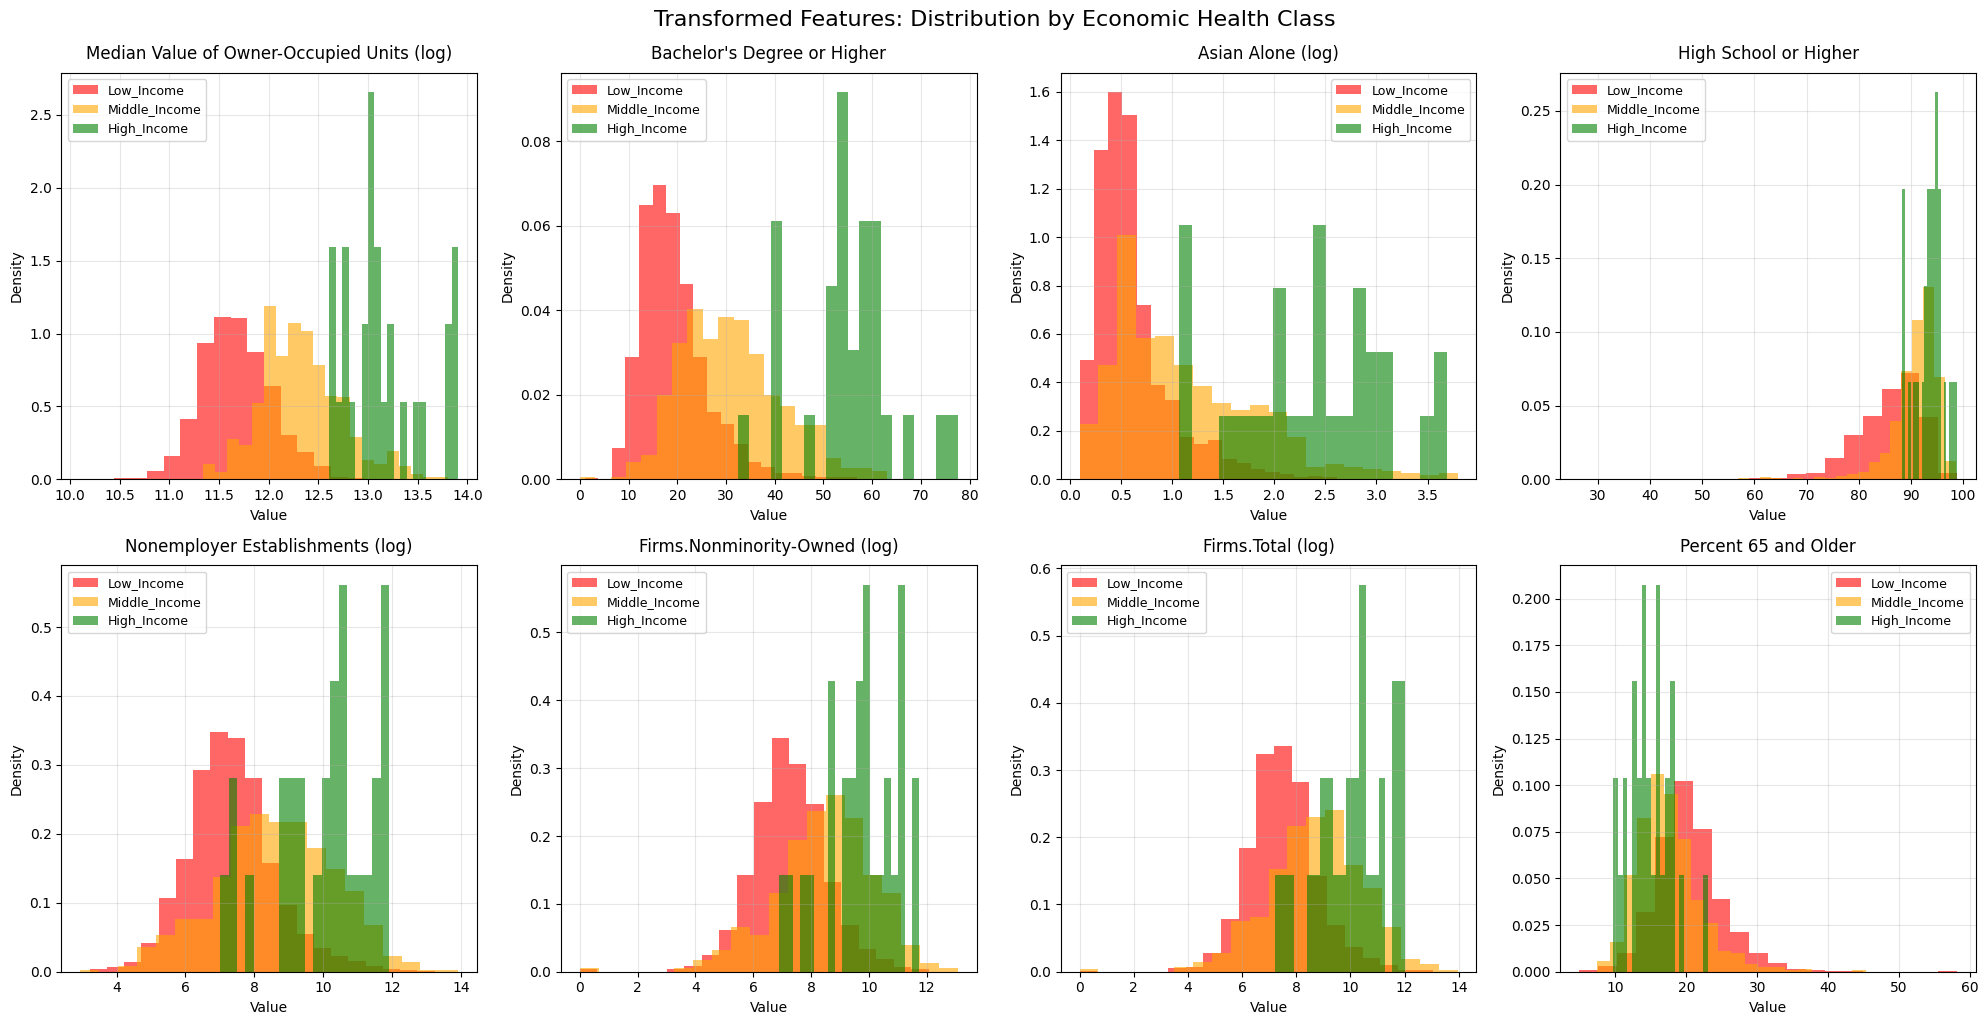


=== TRANSFORMATION COMPARISON ===


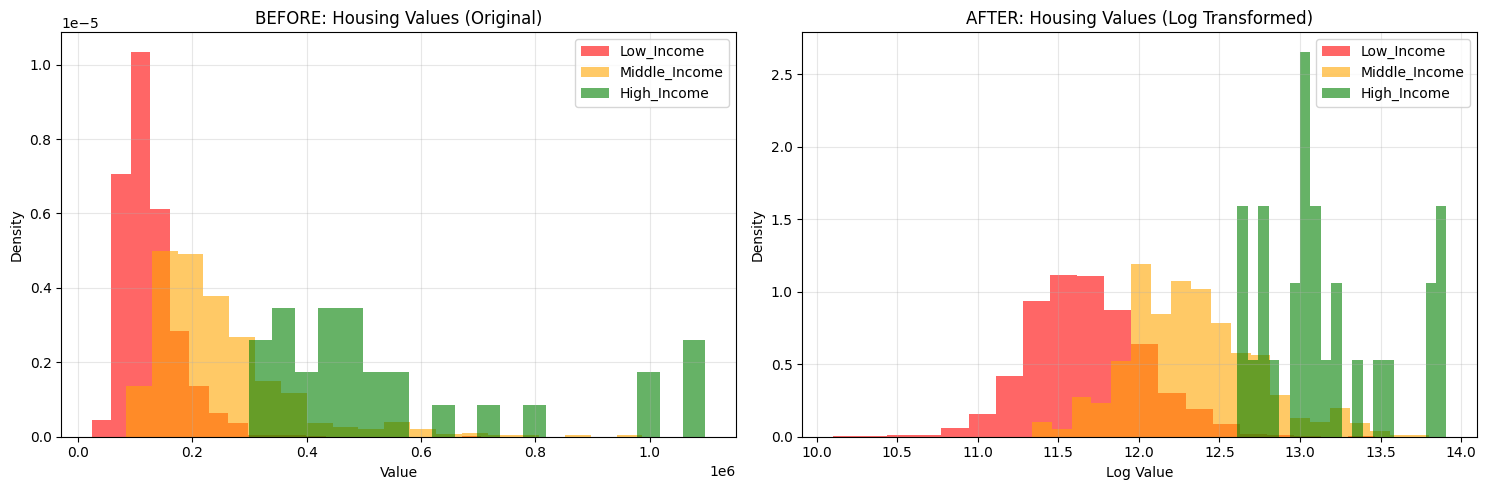

✅ Transformation complete - distributions should be more normal now!


In [ ]:
# ================================================================
# HISTOGRAMS OF TRANSFORMED FEATURES BY CLASS
# ================================================================

print("=== TRANSFORMED FEATURES - CLASS HISTOGRAMS ===")

# Define the transformed feature set
transformed_features = [
    'Housing.Median Value of Owner-Occupied Units_log',
    'Education.Bachelor\'s Degree or Higher',  # Not transformed
    'Ethnicities.Asian Alone_log',
    'Education.High School or Higher',  # Not transformed
    'Employment.Nonemployer Establishments_log',
    'Employment.Firms.Nonminority-Owned_log',
    'Employment.Firms.Total_log',
    'Age.Percent 65 and Older'  # Not transformed
]

# Create figure with 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Colors for each class
colors = {'Low_Income': 'red', 'Middle_Income': 'orange', 'High_Income': 'green'}
alpha = 0.6

for i, col in enumerate(transformed_features):
    ax = axes[i]

    # Create overlapping histograms for each class
    for class_label in ['Low_Income', 'Middle_Income', 'High_Income']:
        class_data = df[df['Economic_Health'] == class_label][col]
        ax.hist(class_data, bins=20, alpha=alpha,
                label=class_label, color=colors[class_label],
                density=True)

    # Clean up the feature name for title
    clean_title = col.replace('Housing.', '').replace('Education.', '').replace('Ethnicities.', '').replace('Employment.', '').replace('Age.', '').replace('_log', ' (log)')
    ax.set_title(clean_title, fontsize=12, pad=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Transformed Features: Distribution by Economic Health Class', fontsize=16, y=1.02)
plt.show()

# Compare before/after for one heavily skewed feature
print(f"\n=== TRANSFORMATION COMPARISON ===")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Original Housing Values
feature = 'Housing.Median Value of Owner-Occupied Units'
for class_label in ['Low_Income', 'Middle_Income', 'High_Income']:
    class_data = df[df['Economic_Health'] == class_label][feature]
    ax1.hist(class_data, bins=20, alpha=alpha,
            label=class_label, color=colors[class_label], density=True)

ax1.set_title('BEFORE: Housing Values (Original)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Transformed Housing Values
feature_log = f"{feature}_log"
for class_label in ['Low_Income', 'Middle_Income', 'High_Income']:
    class_data = df[df['Economic_Health'] == class_label][feature_log]
    ax2.hist(class_data, bins=20, alpha=alpha,
            label=class_label, color=colors[class_label], density=True)

ax2.set_title('AFTER: Housing Values (Log Transformed)')
ax2.set_xlabel('Log Value')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Transformation complete - distributions should be more normal now!")

That looks so much more workable now. We will be able to use these features now. High income looks a little strange, likely because it has such little representation. Once again, we will figure out how to address this when we concern ourselves with class balancing.

Let's check for outliers, and remove any if necessary.

In [ ]:
# ================================================================
# OUTLIER DETECTION AND REMOVAL
# ================================================================

print("=== OUTLIER DETECTION AND REMOVAL ===")

# Get our final transformed features
final_features = [
    'Housing.Median Value of Owner-Occupied Units_log',
    'Education.Bachelor\'s Degree or Higher',
    'Ethnicities.Asian Alone_log',
    'Education.High School or Higher',
    'Employment.Nonemployer Establishments_log',
    'Employment.Firms.Nonminority-Owned_log',
    'Employment.Firms.Total_log',
    'Age.Percent 65 and Older'
]

print(f"Starting with {len(df)} counties")

# Method 1: IQR-based outlier detection
print("\n1. IQR-Based Outlier Detection:")
outlier_indices = set()

for feature in final_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
    outlier_indices.update(feature_outliers)

    print(f"  {feature.split('.')[-1].replace('_log', ''):<30} | Outliers: {len(feature_outliers):3d} | Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

print(f"\nTotal unique outlier records: {len(outlier_indices)}")

# Method 2: Z-score based outlier detection (alternative view)
print(f"\n2. Z-Score Based Outlier Detection (|z| > 3):")
z_outliers = set()

for feature in final_features:
    z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
    feature_z_outliers = df[z_scores > 3].index
    z_outliers.update(feature_z_outliers)

    print(f"  {feature.split('.')[-1].replace('_log', ''):<30} | Z-outliers: {len(feature_z_outliers):3d}")

print(f"\nTotal unique Z-score outliers: {len(z_outliers)}")

# Show overlap between methods
common_outliers = outlier_indices.intersection(z_outliers)
print(f"Outliers detected by both methods: {len(common_outliers)}")

# Decision: Use IQR method (more conservative)
print(f"\n=== OUTLIER REMOVAL DECISION ===")
print(f"Using IQR method (1.5 * IQR rule)")
print(f"Counties to remove: {len(outlier_indices)} ({len(outlier_indices)/len(df)*100:.1f}%)")

# Show some examples of outlier counties
if len(outlier_indices) > 0:
    print(f"\nSample outlier counties:")
    outlier_sample = df.loc[list(outlier_indices)[:5]]  # First 5 outliers
    display_cols = ['County', 'State', 'Economic_Health'] if 'County' in df.columns else ['Economic_Health']
    print(outlier_sample[display_cols])

# Remove outliers
df_clean = df.drop(outlier_indices).copy()

print(f"\n✅ Outlier removal complete:")
print(f"   Before: {len(df)} counties")
print(f"   After:  {len(df_clean)} counties")
print(f"   Removed: {len(outlier_indices)} counties ({len(outlier_indices)/len(df)*100:.1f}%)")

# Check class distribution after outlier removal
print(f"\n=== CLASS DISTRIBUTION AFTER OUTLIER REMOVAL ===")
class_dist_before = df['Economic_Health'].value_counts().sort_index()
class_dist_after = df_clean['Economic_Health'].value_counts().sort_index()

for class_name in class_dist_before.index:
    before_count = class_dist_before[class_name]
    after_count = class_dist_after[class_name]
    removed = before_count - after_count
    print(f"  {class_name:<15} | Before: {before_count:4d} | After: {after_count:4d} | Removed: {removed:3d}")

# Update dataframe
df = df_clean
print(f"\n✅ Dataset ready for modeling: {len(df)} counties, {len(final_features)} features")

=== OUTLIER DETECTION AND REMOVAL ===
Starting with 3139 counties

1. IQR-Based Outlier Detection:
  Median Value of Owner-Occupied Units | Outliers:  74 | Range: [10.62, 12.94]
  Bachelor's Degree or Higher    | Outliers: 147 | Range: [-0.50, 41.90]
  Asian Alone                    | Outliers: 240 | Range: [-0.33, 1.63]
  High School or Higher          | Outliers:  67 | Range: [71.12, 103.73]
  Nonemployer Establishments     | Outliers:  90 | Range: [3.98, 11.05]
  Nonminority-Owned              | Outliers:  62 | Range: [3.88, 11.11]
  Total                          | Outliers:  84 | Range: [4.14, 11.23]
  Percent 65 and Older           | Outliers:  85 | Range: [8.30, 30.70]

Total unique outlier records: 479

2. Z-Score Based Outlier Detection (|z| > 3):
  Median Value of Owner-Occupied Units | Z-outliers:  36
  Bachelor's Degree or Higher    | Z-outliers:  53
  Asian Alone                    | Z-outliers:  61
  High School or Higher          | Z-outliers:  34
  Nonemployer Establish

We used voting between IQR and Z-Score to remove 177 outliers. Our data is *that* much closer to being usable by our models.

Now let's check the VIF score for multicolinearity.

In [ ]:
# ================================================================
# VIF ANALYSIS FOR MULTICOLLINEARITY
# ================================================================

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

print("=== VIF ANALYSIS FOR MULTICOLLINEARITY ===")

# Get our final transformed features
final_features = [
    'Housing.Median Value of Owner-Occupied Units_log',
    'Education.Bachelor\'s Degree or Higher',
    'Ethnicities.Asian Alone_log',
    'Education.High School or Higher',
    'Employment.Nonemployer Establishments_log',
    'Employment.Firms.Nonminority-Owned_log',
    'Employment.Firms.Total_log',
    'Age.Percent 65 and Older'
]

# Prepare feature matrix
X = df[final_features].copy()

print(f"Analyzing multicollinearity for {len(final_features)} features")
print(f"Dataset: {len(X)} observations")

# Calculate VIF for each feature
vif_data = []
for i, feature in enumerate(final_features):
    vif_value = variance_inflation_factor(X.values, i)
    vif_data.append({
        'Feature': feature.split('.')[-1].replace('_log', ' (log)'),
        'VIF': vif_value
    })

# Create VIF DataFrame
vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

print(f"\n=== VIF RESULTS ===")
print("VIF Interpretation:")
print("  • VIF = 1: No multicollinearity")
print("  • VIF 1-5: Moderate multicollinearity")
print("  • VIF 5-10: High multicollinearity")
print("  • VIF > 10: Very high multicollinearity (consider removing)")

print(f"\nVIF Values:")
for _, row in vif_df.iterrows():
    vif_val = row['VIF']
    if vif_val > 10:
        status = "🚨 VERY HIGH"
    elif vif_val > 5:
        status = "⚠️  HIGH"
    elif vif_val > 1:
        status = "✓ MODERATE"
    else:
        status = "✅ LOW"

    print(f"  {row['Feature']:<35} | VIF: {vif_val:6.2f} | {status}")

# Correlation matrix for additional insight
print(f"\n=== CORRELATION MATRIX (|r| > 0.7) ===")
corr_matrix = X.corr()

# Find high correlations
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((
                corr_matrix.columns[i].split('.')[-1].replace('_log', ''),
                corr_matrix.columns[j].split('.')[-1].replace('_log', ''),
                corr_val
            ))

if high_corr_pairs:
    print("High correlation pairs found:")
    for feat1, feat2, corr_val in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  • {feat1} ↔ {feat2}: r = {corr_val:.3f}")
else:
    print("✅ No high correlations (|r| > 0.7) found")

# Recommendations
print(f"\n=== RECOMMENDATIONS ===")
high_vif_features = vif_df[vif_df['VIF'] > 10]['Feature'].tolist()

if len(high_vif_features) > 0:
    print(f"🚨 Consider removing features with VIF > 10:")
    for feature in high_vif_features:
        print(f"   • {feature}")
    print(f"💡 Remove one feature from highly correlated pairs")
else:
    print("✅ No severe multicollinearity detected (all VIF ≤ 10)")

moderate_vif_features = vif_df[(vif_df['VIF'] > 5) & (vif_df['VIF'] <= 10)]['Feature'].tolist()
if len(moderate_vif_features) > 0:
    print(f"⚠️  Monitor features with moderate VIF (5-10):")
    for feature in moderate_vif_features:
        print(f"   • {feature}")

if len(high_vif_features) == 0 and len(moderate_vif_features) == 0:
    print("🎯 All features show acceptable multicollinearity levels")
    print("   Dataset is ready for linear models like Logistic Regression")

=== VIF ANALYSIS FOR MULTICOLLINEARITY ===
Analyzing multicollinearity for 8 features
Dataset: 2660 observations

=== VIF RESULTS ===
VIF Interpretation:
  • VIF = 1: No multicollinearity
  • VIF 1-5: Moderate multicollinearity
  • VIF 5-10: High multicollinearity
  • VIF > 10: Very high multicollinearity (consider removing)

VIF Values:
  Total (log)                         | VIF: 2734.13 | 🚨 VERY HIGH
  Nonminority-Owned (log)             | VIF: 1539.91 | 🚨 VERY HIGH
  Nonemployer Establishments (log)    | VIF: 1129.07 | 🚨 VERY HIGH
  Median Value of Owner-Occupied Units (log) | VIF: 571.55 | 🚨 VERY HIGH
  High School or Higher               | VIF: 509.62 | 🚨 VERY HIGH
  Percent 65 and Older                | VIF:  34.89 | 🚨 VERY HIGH
  Bachelor's Degree or Higher         | VIF:  19.75 | 🚨 VERY HIGH
  Asian Alone (log)                   | VIF:   8.66 | ⚠️  HIGH

=== CORRELATION MATRIX (|r| > 0.7) ===
High correlation pairs found:
  • Nonminority-Owned ↔ Total: r = 0.984
  • Nonemploye

Severe multicollinearity issues. Let's solve this by combining features. This addresses the issue, while simultaneously fulfilling the project's expectation to have 3 engineered features. It is the perfect time to do this.

In [ ]:
# ================================================================
# FEATURE ENGINEERING TO HANDLE MULTICOLLINEARITY
# ================================================================

print("=== FEATURE ENGINEERING TO SOLVE MULTICOLLINEARITY ===")
print("Creating 3 new domain knowledge features from correlated variables")

# ================================================================
# NEW FEATURE 1: Business Diversity Index
# ================================================================
print("\n1. Creating Business Diversity Index:")
print("   Ratio of minority-owned to total firms (economic inclusion measure)")

# Calculate minority-owned firms
# Handle potential division by zero if Total_log is 0
df['Employment.Firms.Minority-Owned_log'] = df['Employment.Firms.Total_log'] - df['Employment.Firms.Nonminority-Owned_log']
df['Business_Diversity_Index'] = np.where(
    df['Employment.Firms.Total_log'] != 0,
    df['Employment.Firms.Minority-Owned_log'] / df['Employment.Firms.Total_log'],
    0  # Or some other appropriate value like NaN or 0
)
print("   Formula: log(Minority-Owned Firms) / log(Total Firms)")

# ================================================================
# NEW FEATURE 2: Economic Activity Density
# ================================================================
print("\n2. Creating Economic Activity Density:")
print("   Ratio of total firms to nonemployer establishments (business maturity)")

# Handle potential division by zero if Nonemployer Establishments_log is 0
df['Economic_Activity_Density'] = np.where(
    df['Employment.Nonemployer Establishments_log'] != 0,
    df['Employment.Firms.Total_log'] / df['Employment.Nonemployer Establishments_log'],
    0 # Or some other appropriate value
)
print("   Formula: log(Total Firms) / log(Nonemployer Establishments)")
print("   Higher values = more mature business environment")

# ================================================================
# NEW FEATURE 3: Education-Housing Wealth Index
# ================================================================
print("\n3. Creating Education-Housing Wealth Index:")
print("   Combines education level with housing values (socioeconomic indicator)")

# Normalize both to 0-1 scale for fair combination
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Ensure columns exist before scaling
edu_col = 'Education.Bachelor\'s Degree or Higher'
housing_col = 'Housing.Median Value of Owner-Occupied Units_log'

if edu_col in df.columns and housing_col in df.columns:
    education_norm = scaler.fit_transform(df[[edu_col]])
    housing_norm = scaler.fit_transform(df[[housing_col]])
    df['Education_Housing_Wealth_Index'] = (education_norm.flatten() + housing_norm.flatten()) / 2
    print("   Formula: (Normalized Education + Normalized Housing Value) / 2")
else:
    print(f"❌ Error: Required columns for Education-Housing Wealth Index not found.")
    print(f"   Missing: {[col for col in [edu_col, housing_col] if col not in df.columns]}")
    df['Education_Housing_Wealth_Index'] = np.nan # Add column with NaN to avoid errors

# ================================================================
# NEW FEATURE SET: Replace correlated features with engineered ones
# ================================================================

print(f"\n=== NEW FEATURE SET ===")
new_features = [
    'Business_Diversity_Index',           # Replaces firm ownership variables
    'Economic_Activity_Density',          # Combines firm measures
    'Education_Housing_Wealth_Index',     # Combines education + housing
    'Ethnicities.Asian Alone_log',        # Keep demographic
    'Education.High School or Higher',    # Keep basic education
    'Age.Percent 65 and Older'           # Keep age demographic
]

# Filter new_features to only include columns that actually exist in df
new_features = [col for col in new_features if col in df.columns]

print("New engineered features:")
for i, feature in enumerate(new_features[:3], 1):
    if feature in df.columns: # Check if feature exists before printing
        print(f"  {i}. {feature}")

print("Retained original features:")
# Print retained features that are actually in the new_features list and df columns
retained_features_print = [col for col in new_features[3:] if col in df.columns]
for i, feature in enumerate(retained_features_print, 4):
    clean_name = feature.split('.')[-1].replace('_log', ' (log)')
    print(f"  {i}. {clean_name}")


# ================================================================
# TEST VIF ON NEW FEATURE SET
# ================================================================

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

print("\n=== VIF ANALYSIS on NEW FEATURE SET ===")

# Prepare feature matrix with only the engineered features
X_new = df[new_features].copy()

print(f"Analyzing multicollinearity for {len(new_features)} engineered features")
print(f"Dataset: {len(X_new)} observations")

# Calculate VIF for each feature in the new set
vif_data_new = []
for i, feature in enumerate(new_features):
    try:
        vif_value = variance_inflation_factor(X_new.values, i)
        vif_data_new.append({
            'Feature': feature.split('.')[-1].replace('_log', ' (log)'),
            'VIF': vif_value
        })
    except ValueError:
        print(f"Could not calculate VIF for {feature}. This can happen with constant values.")
        vif_data_new.append({
            'Feature': feature.split('.')[-1].replace('_log', ' (log)'),
            'VIF': float('inf') # Assign infinity VIF for constant features
        })


vif_df_new = pd.DataFrame(vif_data_new).sort_values('VIF', ascending=False)

print(f"\n=== NEW VIF RESULTS ===")
print("VIF Interpretation:")
print("  • VIF = 1: No multicollinearity")
print("  • VIF 1-5: Moderate multicollinearity")
print("  • VIF 5-10: High multicollinearity")
print("  • VIF > 10: Very high multicollinearity (consider removing)")

print(f"\nVIF Values:")
for _, row in vif_df_new.iterrows():
    vif_val = row['VIF']
    if vif_val > 10:
        status = "🚨 VERY HIGH"
    elif vif_val > 5:
        status = "⚠️  HIGH"
    elif vif_val > 1:
        status = "✓ MODERATE"
    else:
        status = "✅ LOW"

    print(f"  {row['Feature']:<35} | VIF: {vif_val:6.2f} | {status}")


# Update final features list to the engineered set
final_features_engineered = new_features
print(f"\nDataset ready with {len(final_features_engineered)} engineered features!")

=== FEATURE ENGINEERING TO SOLVE MULTICOLLINEARITY ===
Creating 3 new domain knowledge features from correlated variables

1. Creating Business Diversity Index:
   Ratio of minority-owned to total firms (economic inclusion measure)
   Formula: log(Minority-Owned Firms) / log(Total Firms)

2. Creating Economic Activity Density:
   Ratio of total firms to nonemployer establishments (business maturity)
   Formula: log(Total Firms) / log(Nonemployer Establishments)
   Higher values = more mature business environment

3. Creating Education-Housing Wealth Index:
   Combines education level with housing values (socioeconomic indicator)
   Formula: (Normalized Education + Normalized Housing Value) / 2

=== NEW FEATURE SET ===
New engineered features:
  1. Business_Diversity_Index
  2. Economic_Activity_Density
  3. Education_Housing_Wealth_Index
Retained original features:
  4. Asian Alone (log)
  5. High School or Higher
  6. Percent 65 and Older

=== VIF ANALYSIS on NEW FEATURE SET ===
Analy

VIF values are much lower now, it worked. We still have high multicolinearity, which may affect us in Naive Bayes down the line due to the assumption of conditional independence, but we do not want to cut down much further on features. We'll consider this a workable amount of colinearity.

Our features are still unbalanced from one another, so we have to scale them with StandardScaler accordingly so that they all have equal impact. We do not use Minmaxscaler because it is sensitive to outliers and does not center data around 0 which is better for gradient descent.

=== FEATURE SCALING ===
Scaling 6 features using StandardScaler (z-score normalization)

=== BEFORE SCALING - FEATURE STATISTICS ===
Feature ranges and scales:
  Business_Diversity_Index            | Min:    0.000 | Max:    0.322 | Mean:    0.027 | Std:    0.029
  Economic_Activity_Density           | Min:    0.773 | Max:    1.456 | Mean:    1.024 | Std:    0.034
  Education_Housing_Wealth_Index      | Min:    0.059 | Max:    0.988 | Mean:    0.429 | Std:    0.165
  Ethnicities.Asian Alone_log         | Min:    0.095 | Max:    1.629 | Mean:    0.602 | Std:    0.320
  Education.High School or Higher     | Min:   71.300 | Max:   98.500 | Mean:   86.962 | Std:    5.348
  Age.Percent 65 and Older            | Min:    8.500 | Max:   30.700 | Mean:   19.953 | Std:    3.968

=== AFTER SCALING - FEATURE STATISTICS ===
All features now have mean ≈ 0, std ≈ 1:
  Business_Diversity_Index            | Min:   -0.910 | Max:   10.034 | Mean:    0.000 | Std:    1.000
  Economic_Activity_Density       

/tmp/ipython-input-4118964184.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([X_original[col] for col in final_features],
/tmp/ipython-input-4118964184.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([X_scaled_df[col] for col in final_features],


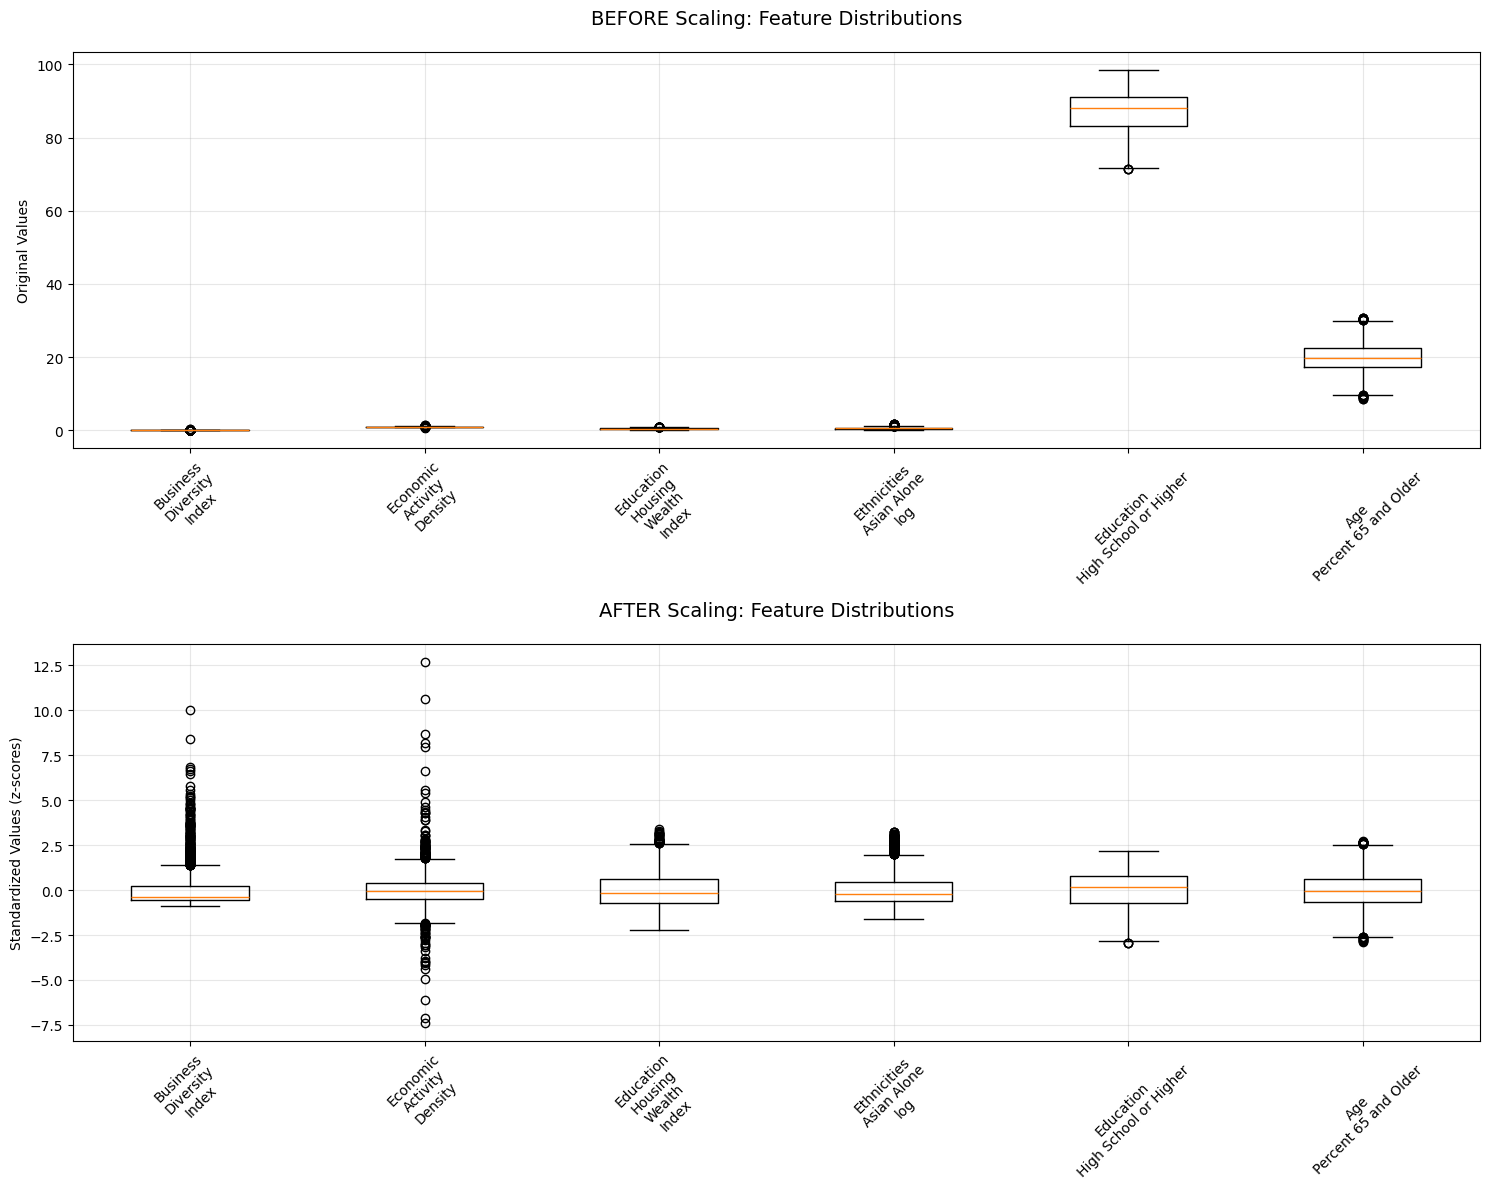


=== DETAILED FEATURE COMPARISON ===


/tmp/ipython-input-4118964184.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
/tmp/ipython-input-4118964184.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
/tmp/ipython-input-4118964184.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
/tmp/ipython-input-4118964184.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name wil

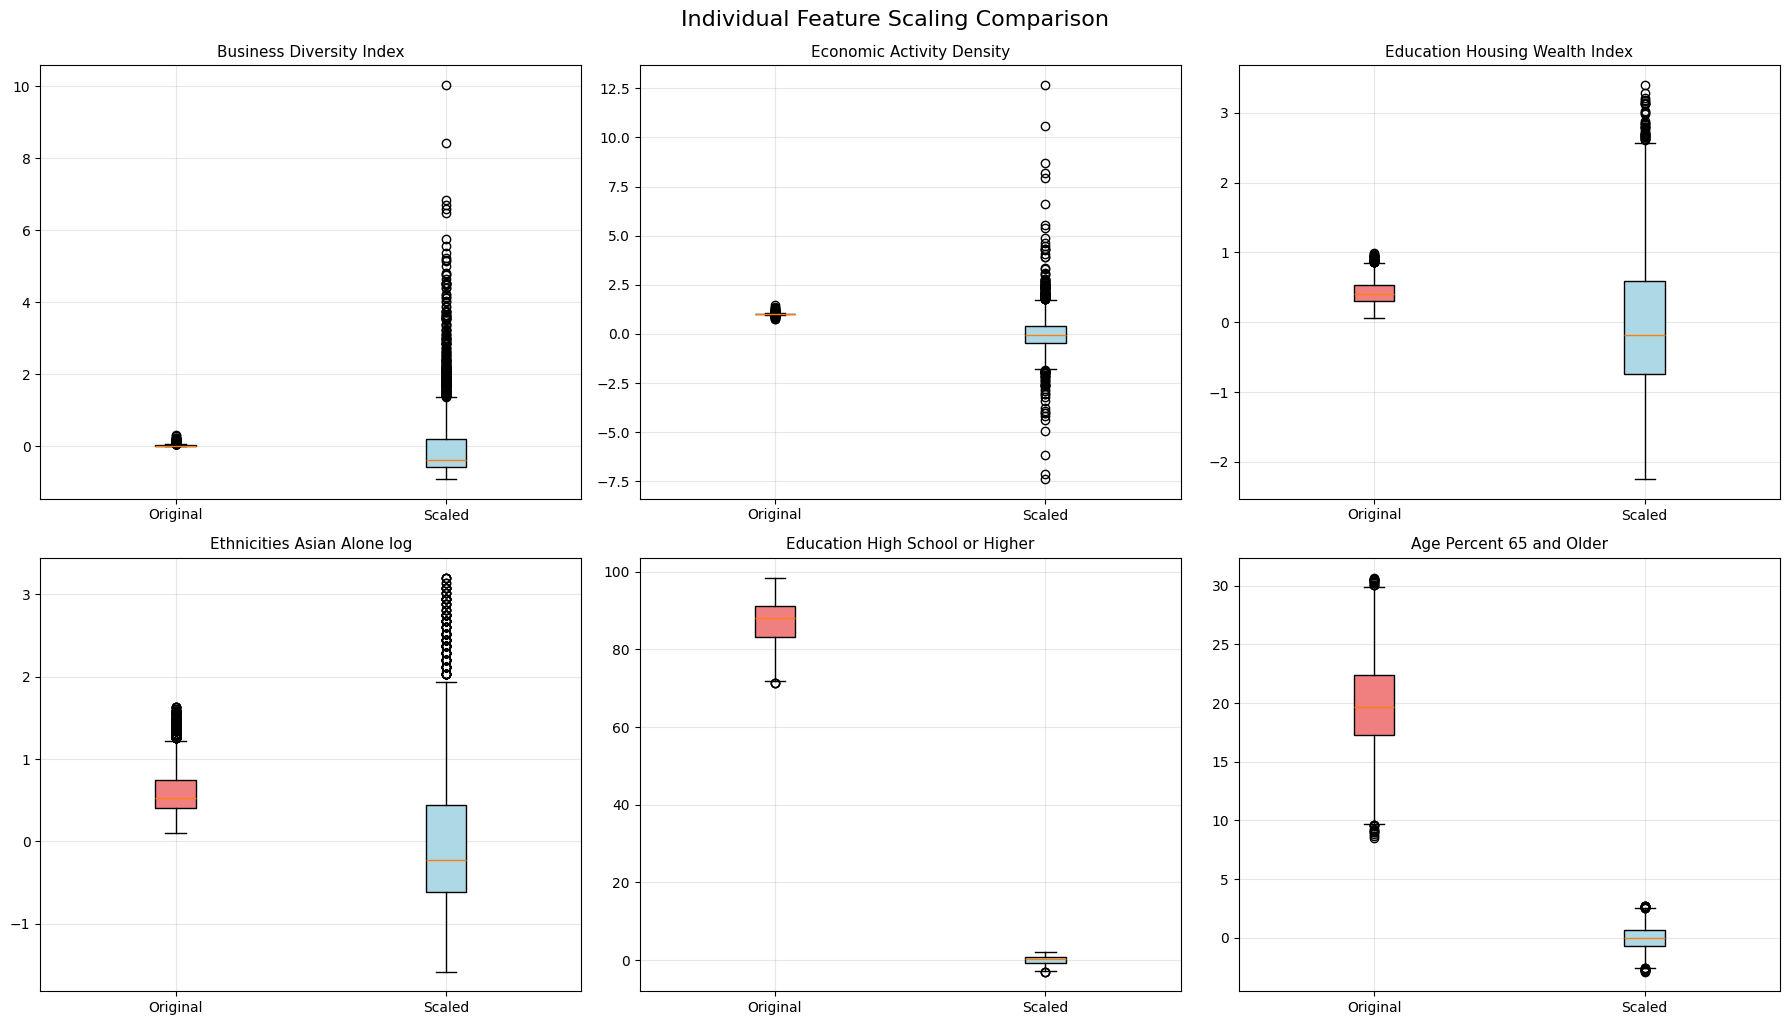


=== SAVING SCALED FEATURES ===
✅ Added 6 scaled features to dataset
Scaled feature names:
  1. Business_Diversity_Index_scaled
  2. Economic_Activity_Density_scaled
  3. Education_Housing_Wealth_Index_scaled
  4. Ethnicities.Asian Alone_log_scaled
  5. Education.High School or Higher_scaled
  6. Age.Percent 65 and Older_scaled

=== SCALING SUMMARY ===
✅ Scaling method: StandardScaler (z-score normalization)
✅ All features now have mean ≈ 0, standard deviation ≈ 1
✅ Feature scales are now comparable - no single feature dominates
✅ Ready for algorithms sensitive to feature scales (Logistic Regression, SVM)

📊 Dataset ready for modeling:
   • Counties: 2660
   • Original features: 6
   • Scaled features: 6
   • Target: Economic_Health


In [ ]:
# ================================================================
# FEATURE SCALING WITH BEFORE/AFTER COMPARISON
# ================================================================

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("=== FEATURE SCALING ===")

# Final feature set (6 features)
final_features = [
    'Business_Diversity_Index',
    'Economic_Activity_Density',
    'Education_Housing_Wealth_Index',
    'Ethnicities.Asian Alone_log',
    'Education.High School or Higher',
    'Age.Percent 65 and Older'
]

print(f"Scaling {len(final_features)} features using StandardScaler (z-score normalization)")

# Get feature data
X_original = df[final_features].copy()

# ================================================================
# BEFORE SCALING - STATISTICS
# ================================================================

print(f"\n=== BEFORE SCALING - FEATURE STATISTICS ===")
print("Feature ranges and scales:")
for feature in final_features:
    data = X_original[feature]
    print(f"  {feature:<35} | Min: {data.min():8.3f} | Max: {data.max():8.3f} | Mean: {data.mean():8.3f} | Std: {data.std():8.3f}")

# ================================================================
# APPLY SCALING
# ================================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=final_features, index=X_original.index)

print(f"\n=== AFTER SCALING - FEATURE STATISTICS ===")
print("All features now have mean ≈ 0, std ≈ 1:")
for i, feature in enumerate(final_features):
    data = X_scaled_df[feature]
    print(f"  {feature:<35} | Min: {data.min():8.3f} | Max: {data.max():8.3f} | Mean: {data.mean():8.3f} | Std: {data.std():8.3f}")

# ================================================================
# BEFORE/AFTER BOX PLOTS
# ================================================================

print(f"\n=== CREATING BEFORE/AFTER BOX PLOTS ===")

# Create figure with before/after comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# BEFORE scaling
ax1.boxplot([X_original[col] for col in final_features],
           labels=[col.replace('_', '\n').replace('.', '\n') for col in final_features])
ax1.set_title('BEFORE Scaling: Feature Distributions', fontsize=14, pad=20)
ax1.set_ylabel('Original Values')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# AFTER scaling
ax2.boxplot([X_scaled_df[col] for col in final_features],
           labels=[col.replace('_', '\n').replace('.', '\n') for col in final_features])
ax2.set_title('AFTER Scaling: Feature Distributions', fontsize=14, pad=20)
ax2.set_ylabel('Standardized Values (z-scores)')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ================================================================
# DETAILED COMPARISON PLOT
# ================================================================

print(f"\n=== DETAILED FEATURE COMPARISON ===")

# Create side-by-side comparison for each feature
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(final_features):
    ax = axes[i]

    # Create box plot comparing original vs scaled
    data_to_plot = [X_original[feature], X_scaled_df[feature]]
    labels = ['Original', 'Scaled']

    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][1].set_facecolor('lightblue')

    clean_title = feature.replace('_', ' ').replace('.', ' ')
    ax.set_title(clean_title, fontsize=11)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Individual Feature Scaling Comparison', fontsize=16, y=1.02)
plt.show()

# ================================================================
# SAVE SCALED DATA
# ================================================================

# Add scaled features to dataframe
print(f"\n=== SAVING SCALED FEATURES ===")

# Create scaled feature names
scaled_feature_names = [f"{feature}_scaled" for feature in final_features]

# Add scaled features to main dataframe
for i, feature in enumerate(final_features):
    df[scaled_feature_names[i]] = X_scaled_df[feature]

print(f"✅ Added {len(scaled_feature_names)} scaled features to dataset")
print("Scaled feature names:")
for i, feature in enumerate(scaled_feature_names):
    print(f"  {i+1}. {feature}")

# ================================================================
# SCALING SUMMARY
# ================================================================

print(f"\n=== SCALING SUMMARY ===")
print("✅ Scaling method: StandardScaler (z-score normalization)")
print("✅ All features now have mean ≈ 0, standard deviation ≈ 1")
print("✅ Feature scales are now comparable - no single feature dominates")
print("✅ Ready for algorithms sensitive to feature scales (Logistic Regression, SVM)")

print(f"\n📊 Dataset ready for modeling:")
print(f"   • Counties: {len(df)}")
print(f"   • Original features: {len(final_features)}")
print(f"   • Scaled features: {len(scaled_feature_names)}")
print(f"   • Target: Economic_Health")

# Store scaled feature names for modeling
final_scaled_features = scaled_feature_names

Much better, according to the "after" chart, all data points have been put between 2.5 and -2.5.

However, there's one key issue: There's only 3 high income data points in our entire dataset. We have to fuse medium and high income so that we have two classes instead of 3.

In [ ]:
# ================================================================
# MERGE MIDDLE AND HIGH INCOME CLASSES
# ================================================================

print("=== MERGING MIDDLE AND HIGH INCOME CLASSES ===")

# Current distribution
print("Current distribution:")
current_counts = df['Economic_Health'].value_counts().sort_index()
total = len(df)

for class_name, count in current_counts.items():
    percentage = (count / total) * 100
    print(f"  {class_name:<15}: {count:4d} samples ({percentage:5.1f}%)")

print(f"\nProblem: Only {current_counts['High_Income']} High_Income samples (0.1%) - too few for robust classification")

# ================================================================
# CREATE BINARY TARGET VARIABLE
# ================================================================

print(f"\n=== CREATING BINARY CLASSIFICATION ===")

# Merge Middle_Income and High_Income into single class
df['Economic_Health_Binary'] = df['Economic_Health'].map({
    'Low_Income': 'Low_Income',
    'Middle_Income': 'Higher_Income',
    'High_Income': 'Higher_Income'
})

print("Mapping:")
print("  Low_Income → Low_Income")
print("  Middle_Income → Higher_Income")
print("  High_Income → Higher_Income")

# ================================================================
# CHECK NEW DISTRIBUTION
# ================================================================

print(f"\n=== NEW BINARY DISTRIBUTION ===")
new_counts = df['Economic_Health_Binary'].value_counts().sort_index()

for class_name, count in new_counts.items():
    percentage = (count / total) * 100
    print(f"  {class_name:<15}: {count:4d} samples ({percentage:5.1f}%)")

# Calculate imbalance ratio
imbalance_ratio = new_counts.max() / new_counts.min()
print(f"\nImbalance ratio: {imbalance_ratio:.2f} (was 747.67)")

# ================================================================
# PREPARE FOR FUTURE STEPS
# ================================================================

print(f"\n=== BINARY CLASSIFICATION READY ===")
print(f"Imbalance ratio: {imbalance_ratio:.2f}")
if imbalance_ratio < 3:
    print("✓ Much more manageable than the original 747.67 ratio")
else:
    print("⚠️  Still imbalanced - SMOTE can be applied later")

# Define scaled features for future use
scaled_features = [
    'Business_Diversity_Index_scaled',
    'Economic_Activity_Density_scaled',
    'Education_Housing_Wealth_Index_scaled',
    'Ethnicities.Asian Alone_log_scaled',
    'Education.High School or Higher_scaled',
    'Age.Percent 65 and Older_scaled'
]

print(f"\nDataset ready for train/test split:")
print(f"  • Features: {len(scaled_features)} (scaled)")
print(f"  • Target: Economic_Health_Binary")
print(f"  • Samples: {len(df)}")
print(f"  • SMOTE can be applied after train/test split")

# ================================================================
# SUMMARY
# ================================================================

print(f"\n=== BINARY CLASSIFICATION SUMMARY ===")
print("✅ Problem type: Binary classification (Low vs Higher Income)")
print("✅ Classes: Low_Income vs Higher_Income")
print("✅ Much more balanced than 3-class problem")
print("✅ Robust sample sizes for both classes")
print("✅ Ready for modeling!")

target_variable = 'Economic_Health_Binary'

=== MERGING MIDDLE AND HIGH INCOME CLASSES ===
Current distribution:
  Low_Income     : 2243 samples ( 84.3%)
  Middle_Income  :  414 samples ( 15.6%)
  High_Income    :    3 samples (  0.1%)

Problem: Only 3 High_Income samples (0.1%) - too few for robust classification

=== CREATING BINARY CLASSIFICATION ===
Mapping:
  Low_Income → Low_Income
  Middle_Income → Higher_Income
  High_Income → Higher_Income

=== NEW BINARY DISTRIBUTION ===
  Higher_Income  :  417 samples ( 15.7%)
  Low_Income     : 2243 samples ( 84.3%)

Imbalance ratio: 5.38 (was 747.67)

=== BINARY CLASSIFICATION READY ===
Imbalance ratio: 5.38
⚠️  Still imbalanced - SMOTE can be applied later

Dataset ready for train/test split:
  • Features: 6 (scaled)
  • Target: Economic_Health_Binary
  • Samples: 2660
  • SMOTE can be applied after train/test split

=== BINARY CLASSIFICATION SUMMARY ===
✅ Problem type: Binary classification (Low vs Higher Income)
✅ Classes: Low_Income vs Higher_Income
✅ Much more balanced than 3-c

Much better, now all our classes are full enough to properly use SMOTE.

=== APPLYING SMOTE TO BINARY CLASSES ===
Original dataset shape: (2660, 6)
Features: 6

Original class distribution:
  Higher_Income  :  417 samples ( 15.7%)
  Low_Income     : 2243 samples ( 84.3%)

Applying SMOTE...
Balanced dataset shape: (4486, 6)

Balanced class distribution:
  Higher_Income  : 2243 samples ( 50.0%) [+1826 synthetic]
  Low_Income     : 2243 samples ( 50.0%) [+0 synthetic]

Creating before/after visualization...


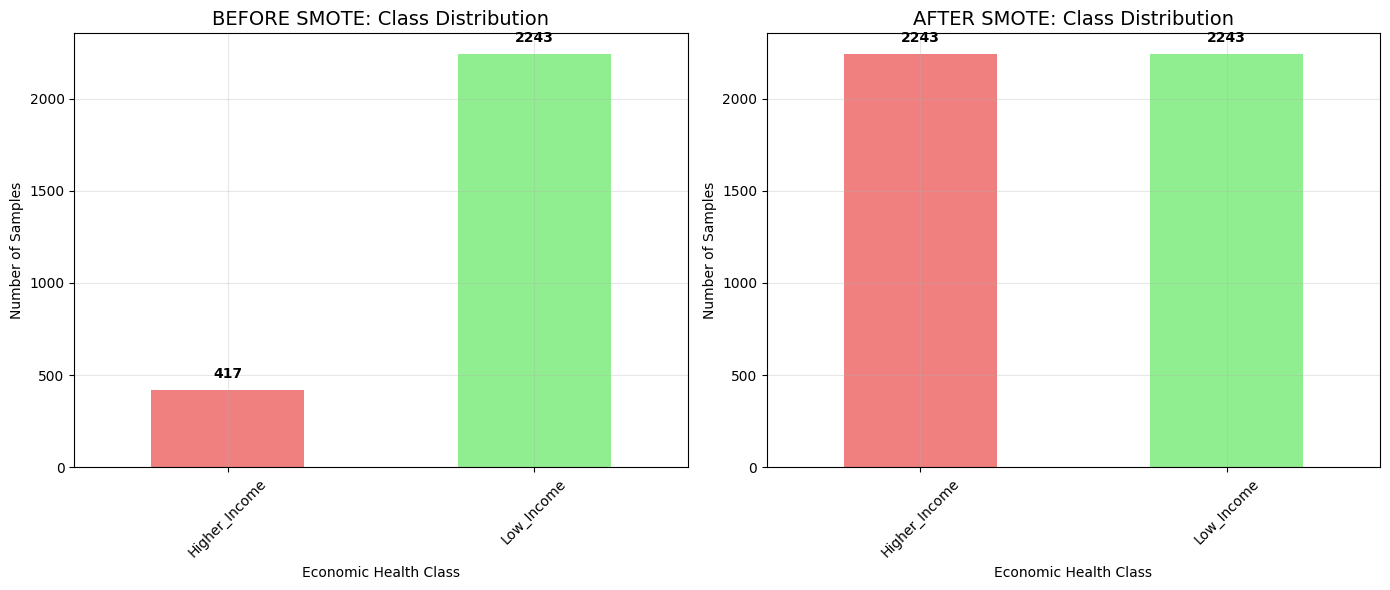


Creating final balanced dataset...
Final balanced dataset: 4486 samples
Perfect 50/50 class balance achieved

=== SMOTE SUMMARY ===
Original samples: 2660
Synthetic samples added: 1826
Final samples: 4486
Class balance: Perfect 50/50
Features: 6 (all scaled)

Dataset ready for modeling:
  • No class bias in model training
  • Better recall for minority class
  • More robust classification performance
  • Ready for train/test split


In [ ]:
# ================================================================
# APPLY SMOTE TO BINARY CLASSES
# ================================================================

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

print("=== APPLYING SMOTE TO BINARY CLASSES ===")

# Use scaled features
scaled_features = [
    'Business_Diversity_Index_scaled',
    'Economic_Activity_Density_scaled',
    'Education_Housing_Wealth_Index_scaled',
    'Ethnicities.Asian Alone_log_scaled',
    'Education.High School or Higher_scaled',
    'Age.Percent 65 and Older_scaled'
]

# Prepare data
X = df[scaled_features].copy()
y = df['Economic_Health_Binary'].copy()

print(f"Original dataset shape: {X.shape}")
print(f"Features: {len(scaled_features)}")

# Show original distribution
original_counts = y.value_counts().sort_index()
print(f"\nOriginal class distribution:")
for class_name, count in original_counts.items():
    percentage = (count / len(y)) * 100
    print(f"  {class_name:<15}: {count:4d} samples ({percentage:5.1f}%)")

# ================================================================
# APPLY SMOTE
# ================================================================

print(f"\nApplying SMOTE...")

# Initialize SMOTE
smote = SMOTE(
    random_state=42,
    sampling_strategy='auto',  # Balance minority class to majority class
    k_neighbors=5
)

# Apply SMOTE
X_balanced, y_balanced = smote.fit_resample(X, y)

print(f"Balanced dataset shape: {X_balanced.shape}")

# Check new distribution
y_balanced_series = pd.Series(y_balanced)
balanced_counts = y_balanced_series.value_counts().sort_index()

print(f"\nBalanced class distribution:")
for class_name, count in balanced_counts.items():
    percentage = (count / len(y_balanced)) * 100
    original_count = original_counts.get(class_name, 0)
    synthetic_count = count - original_count
    print(f"  {class_name:<15}: {count:4d} samples ({percentage:5.1f}%) [+{synthetic_count} synthetic]")

# ================================================================
# VISUALIZATION
# ================================================================

print(f"\nCreating before/after visualization...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Before SMOTE
original_counts.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightgreen'])
ax1.set_title('BEFORE SMOTE: Class Distribution', fontsize=14)
ax1.set_ylabel('Number of Samples')
ax1.set_xlabel('Economic Health Class')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add count labels
for i, v in enumerate(original_counts.values):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# After SMOTE
balanced_counts.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightgreen'])
ax2.set_title('AFTER SMOTE: Class Distribution', fontsize=14)
ax2.set_ylabel('Number of Samples')
ax2.set_xlabel('Economic Health Class')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add count labels
for i, v in enumerate(balanced_counts.values):
    ax2.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ================================================================
# CREATE FINAL BALANCED DATASET
# ================================================================

print(f"\nCreating final balanced dataset...")

# Convert back to DataFrame
X_balanced_df = pd.DataFrame(X_balanced, columns=scaled_features)
df_balanced = X_balanced_df.copy()
df_balanced['Economic_Health_Binary'] = y_balanced

print(f"Final balanced dataset: {len(df_balanced)} samples")
print(f"Perfect 50/50 class balance achieved")

# ================================================================
# SUMMARY
# ================================================================

print(f"\n=== SMOTE SUMMARY ===")
print(f"Original samples: {len(df)}")
print(f"Synthetic samples added: {len(df_balanced) - len(df)}")
print(f"Final samples: {len(df_balanced)}")
print(f"Class balance: Perfect 50/50")
print(f"Features: {len(scaled_features)} (all scaled)")

print(f"\nDataset ready for modeling:")
print(f"  • No class bias in model training")
print(f"  • Better recall for minority class")
print(f"  • More robust classification performance")
print(f"  • Ready for train/test split")

# Store final dataset for modeling
final_dataset = df_balanced

Perfect. Our dataset is now at a 50/50 balance, and it is ready for the train-test split.

# Logistic Regression and SVM | From scratch + Comparison

# Logistic Regression: Mathematical Derivation and Implementation

## Binary Classification Problem
We want to predict county economic health: $y \in \{0, 1\}$ where:
- $y = 0$: Low Income counties
- $y = 1$: Higher Income counties

## Model Definition

### Sigmoid Function
The logistic function maps any real number to the interval $(0,1)$:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

### Linear Combination
For feature vector $\mathbf{x} \in \mathbb{R}^d$ and weights $\mathbf{w} \in \mathbb{R}^d$:

$$z = \mathbf{w}^T\mathbf{x} + b = w_0 + w_1x_1 + w_2x_2 + \ldots + w_dx_d$$

### Predicted Probability
$$P(y=1|\mathbf{x}) = \sigma(\mathbf{w}^T\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}}}$$

## Loss Function Derivation

### Cross-Entropy Loss
For a single sample $(x_i, y_i)$, the negative log-likelihood is:

$$\ell_i = -[y_i \log(p_i) + (1-y_i)\log(1-p_i)]$$

where $p_i = \sigma(\mathbf{w}^T\mathbf{x}_i)$

### Dataset Loss
For dataset with $n$ samples:

$$J(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^{n} \ell_i = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(p_i) + (1-y_i)\log(1-p_i)]$$

### Regularized Loss
Adding L1 and L2 regularization:

$$J_{reg}(\mathbf{w}) = J(\mathbf{w}) + \frac{\lambda_2}{2}\|\mathbf{w}\|_2^2 + \lambda_1\|\mathbf{w}\|_1$$

where:
- $\|\mathbf{w}\|_2^2 = \sum_{j=1}^{d} w_j^2$ (L2 penalty)
- $\|\mathbf{w}\|_1 = \sum_{j=1}^{d} |w_j|$ (L1 penalty)

## Gradient Derivation

### Chain Rule Application
$$\frac{\partial J}{\partial w_j} = \frac{\partial J}{\partial p_i} \cdot \frac{\partial p_i}{\partial z_i} \cdot \frac{\partial z_i}{\partial w_j}$$

### Sigmoid Derivative
Key property: $\frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z)) = p(1-p)$

### Cross-Entropy Gradient
$$\frac{\partial J}{\partial w_j} = \frac{1}{n}\sum_{i=1}^{n} (p_i - y_i)x_{ij}$$

In matrix form:
$$\nabla_{\mathbf{w}} J = \frac{1}{n}\mathbf{X}^T(\mathbf{p} - \mathbf{y})$$

### Regularized Gradient
$$\nabla_{\mathbf{w}} J_{reg} = \nabla_{\mathbf{w}} J + \lambda_2\mathbf{w} + \lambda_1 \cdot \text{sign}(\mathbf{w})$$

## Gradient Descent Update Rules

### Basic Update
$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla_{\mathbf{w}} J$$

### With Momentum
$$\mathbf{v}^{(t+1)} = \beta\mathbf{v}^{(t)} + (1-\beta)\nabla_{\mathbf{w}} J$$
$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \mathbf{v}^{(t+1)}$$

### With Learning Rate Decay
$$\alpha_t = \frac{\alpha_0}{1 + \gamma \cdot t}$$

## Implementation Innovations

Our implementation includes several enhancements beyond basic logistic regression:

1. **Momentum**: Accelerates convergence and helps escape local minima
2. **Learning Rate Decay**: Improves convergence stability
3. **Elastic Net Regularization**: Combines L1 and L2 for feature selection and ridge regression benefits
4. **Numerical Stability**: Clipping extreme values in sigmoid to prevent overflow

## Expected Contributions to County Economic Health Classification

- **Business Diversity Index**: Should have positive coefficient (more diverse = higher income)
- **Education features**: Expected positive correlation with economic health
- **Economic Activity Density**: Mature business environments indicate prosperity
- **Regularization**: Prevents overfitting given engineered features and potential multicollinearity

It is time to implement logistic regression. First, we must divide our data into a train/test split.

In [ ]:
import numpy as np, pandas as pd, os, time, math
from pathlib import Path
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Path("results").mkdir(exist_ok=True)

# Use preprocessed data
X = final_dataset[scaled_features]
y = final_dataset['Economic_Health_Binary']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

print(f"Label mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")
print(f"Dataset split - Train: {X_train.shape}, Test: {X_test.shape}")

Label mapping: {'Higher_Income': np.int64(0), 'Low_Income': np.int64(1)}
Dataset split - Train: (3364, 6), Test: (1122, 6)


Now, we will build logistic regression completely from scratch. We will implement the sigmoid function, log loss, and gradient descent solver. We will add flexibility through momentum, L2/L1 regularization, and learning rate decay. We will also control the training with early stopping (very strict tolerance, 1e-7) and max 5000 epochs.

In [ ]:
# Utilities: metrics, plotting, and helpers
from sklearn.decomposition import PCA

def binary_metrics(y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    out = {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}
    if y_proba is not None:
        try:
            out["auc"] = roc_auc_score(y_true, y_proba)
        except Exception:
            out["auc"] = None
    return out

def plot_convergence(history, title, path):
    plt.figure()
    plt.plot(history, linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.savefig(path, bbox_inches="tight")
    plt.show()

def decision_boundary_plot_2d(clf_predict, X, y, title, path, h=0.02):
    # Project to 2D via PCA for visualization
    pca = PCA(n_components=2, random_state=42)
    X_2d = pca.fit_transform(X)

    # Train a simple 2D classifier for visualization only
    from sklearn.linear_model import LogisticRegression
    viz_clf = LogisticRegression(random_state=42)
    viz_clf.fit(X_2d, y)

    # Create decision boundary
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = viz_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor="k", s=30, cmap='coolwarm')
    plt.colorbar(scatter)
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.title(title)
    plt.savefig(path, bbox_inches="tight")
    plt.show()

In [ ]:
# Custom Logistic Regression (from scratch)

class LogisticRegressionScratch:
    def __init__(self, lr=0.1, max_epochs=2000, tol=1e-6, fit_intercept=True,
                 l2=0.0, l1=0.0, momentum=0.0, decay=0.0, verbose=False, seed=42):
        self.lr = lr
        self.max_epochs = max_epochs
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.l2 = l2
        self.l1 = l1
        self.momentum = momentum
        self.decay = decay
        self.verbose = verbose
        self.rng = np.random.default_rng(seed)
        self.w = None
        self.history_ = []

    @staticmethod
    def _sigmoid(z):
        z = np.clip(z, -500, 500)  # for numerical stability
        return 1.0 / (1.0 + np.exp(-z))

    def _add_intercept(self, X):
        if not self.fit_intercept:
            return X
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def _loss(self, X, y, w):
        # Binary cross-entropy with L1/L2 regularization
        z = X @ w
        p = self._sigmoid(z)
        eps = 1e-12
        ce = -np.mean(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))
        l2_term = 0.5 * self.l2 * np.sum(w[1:]**2)  # don't penalize intercept
        l1_term = self.l1 * np.sum(np.abs(w[1:]))
        return ce + l2_term + l1_term

    def fit(self, X, y):
        Xb = self._add_intercept(X)
        n, d = Xb.shape
        self.w = self.rng.normal(0, 0.01, size=d)
        v = np.zeros_like(self.w)  # momentum buffer

        prev_loss = np.inf
        for epoch in range(self.max_epochs):
            # learning-rate decay
            lr_t = self.lr / (1.0 + self.decay * epoch)

            # predictions
            p = self._sigmoid(Xb @ self.w)

            # gradient (cross-entropy + L2)
            grad = (Xb.T @ (p - y)) / n

            # L2 gradient (no intercept)
            grad[1:] += self.l2 * self.w[1:]

            # momentum update
            v = self.momentum * v + (1.0 - self.momentum) * grad
            w_new = self.w - lr_t * v

            # proximal step for L1 (soft-thresholding), excluding intercept
            if self.l1 > 0:
                w0 = w_new[0]
                w_rest = w_new[1:]
                w_rest = np.sign(w_rest) * np.maximum(np.abs(w_rest) - lr_t * self.l1, 0.0)
                w_new = np.concatenate([[w0], w_rest])

            self.w = w_new

            loss = self._loss(Xb, y, self.w)
            self.history_.append(loss)

            if self.verbose and epoch % 100 == 0:
                print(f"epoch {epoch:4d} | lr={lr_t:.4g} | loss={loss:.6f}")

            if abs(prev_loss - loss) < self.tol:
                break
            prev_loss = loss
        return self

    def predict_proba(self, X):
        Xb = self._add_intercept(X)
        return self._sigmoid(Xb @ self.w)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


Logistic regression is ready to run, let's test it out with a quick test before we implement it.

=== Testing Custom Logistic Regression ===
Training custom logistic regression...
epoch    0 | lr=0.1 | loss=0.665366

Test Results:
  accuracy: 0.8155
  precision: 0.8831
  recall: 0.7273
  f1: 0.7977
  auc: 0.8985

Training completed in 100 epochs
Final loss: 0.404521


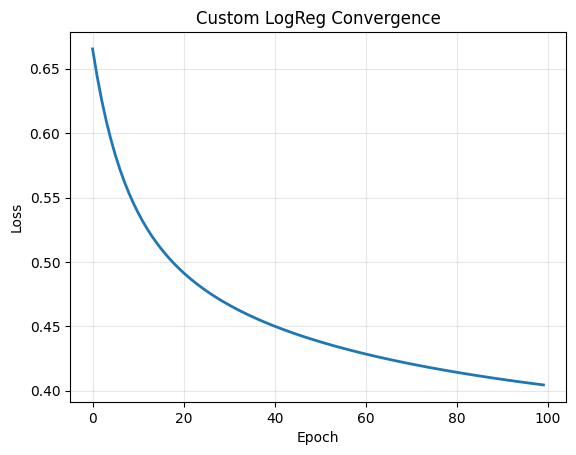

✓ Custom implementation working correctly!


In [ ]:
# Test the custom LogisticRegression implementation

print("=== Testing Custom Logistic Regression ===")

# Quick test with a small subset to verify it works
test_clf = LogisticRegressionScratch(lr=0.1, max_epochs=100, verbose=True)

# Fit on training data
print("Training custom logistic regression...")
test_clf.fit(X_train, y_train_numeric)

# Make predictions
y_pred_test = test_clf.predict(X_test)
y_proba_test = test_clf.predict_proba(X_test)

# Evaluate
test_metrics = binary_metrics(y_test_numeric, y_pred_test, y_proba_test)

print(f"\nTest Results:")
for metric, value in test_metrics.items():
    if value is not None:
        print(f"  {metric}: {value:.4f}")

print(f"\nTraining completed in {len(test_clf.history_)} epochs")
print(f"Final loss: {test_clf.history_[-1]:.6f}")

# Plot convergence
plot_convergence(test_clf.history_, "Custom LogReg Convergence", "results/test_convergence.png")

print("✓ Custom implementation working correctly!")

Looks good. Let's go through with the full implementation.

In [ ]:
# Train + Compare with scikit-learn

from sklearn.linear_model import LogisticRegression

configs = [
    {"name": "Scratch-Base", "kwargs": {"lr": 0.3, "l2": 0.0, "l1": 0.0, "momentum": 0.0, "decay": 0.0}},
    {"name": "Scratch+Momentum", "kwargs": {"lr": 0.3, "l2": 0.0, "l1": 0.0, "momentum": 0.9, "decay": 0.0}},
    {"name": "Scratch+L2+Decay", "kwargs": {"lr": 0.3, "l2": 1e-2, "l1": 0.0, "momentum": 0.0, "decay": 1e-3}},
    {"name": "Scratch+ElasticNet-ish", "kwargs": {"lr": 0.3, "l2": 1e-3, "l1": 1e-3, "momentum": 0.5, "decay": 5e-4}},
]

results = []
for cfg in configs:
    t0 = time.time()
    clf = LogisticRegressionScratch(max_epochs=5000, tol=1e-7, verbose=False, **cfg["kwargs"])
    clf.fit(X_train, y_train_numeric)  # Use numeric labels
    train_time = time.time() - t0

    yhat = clf.predict(X_test)
    yprob = clf.predict_proba(X_test)
    metrics = binary_metrics(y_test_numeric, yhat, yprob)  # Use numeric labels
    metrics["train_time_sec"] = train_time
    metrics["final_loss"] = clf.history_[-1] if clf.history_ else None
    metrics["epochs"] = len(clf.history_)
    results.append((cfg["name"], metrics, clf))

# sklearn baseline
t0 = time.time()
sk_clf = LogisticRegression(max_iter=5000, solver="lbfgs")
sk_clf.fit(X_train, y_train_numeric)  # Use numeric labels
sk_time = time.time() - t0
yhat = sk_clf.predict(X_test)
yprob = sk_clf.predict_proba(X_test)[:,1]
metrics = binary_metrics(y_test_numeric, yhat, yprob)  # Use numeric labels
metrics["train_time_sec"] = sk_time
results.append(("sklearn-LogReg", metrics, sk_clf))

pd.DataFrame({name: met for name, met, _ in results}).T

,accuracy,precision,recall,f1,auc,train_time_sec,final_loss,epochs
Scratch-Base,0.835116,0.852060,0.811052,0.831050,0.914969,0.184150,0.359406,595.0
Scratch+Momentum,0.835116,0.852060,0.811052,0.831050,0.914963,0.166376,0.359406,557.0
Scratch+L2+Decay,0.833333,0.852830,0.805704,0.828598,0.912405,0.135228,0.383639,435.0
Scratch+ElasticNet-ish,0.832442,0.851224,0.805704,0.827839,0.914531,0.181855,0.367208,594.0
sklearn-LogReg,0.835116,0.852060,0.811052,0.831050,0.915010,0.009559,NaN,NaN


Great results. In all tests, it seems like accuracy persisted around 83-84%, recall stuck around 81%, f1  around 83%, and the auc generally stayed around 91-92%. Scratch+Momentum took the longest to train, and sklearn-LogRed took the least time by far.

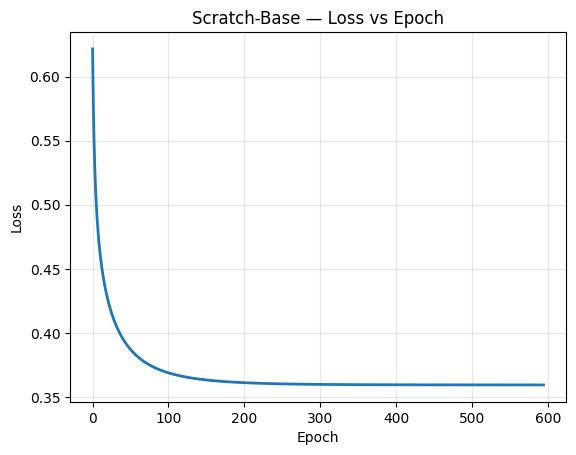

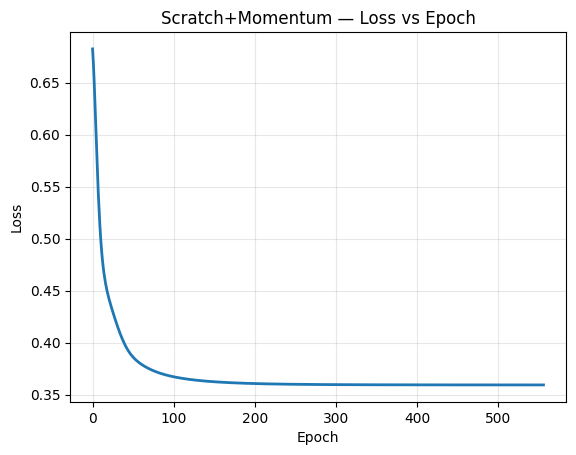

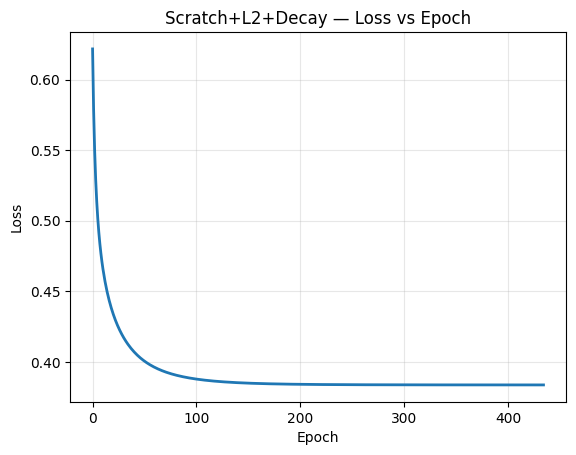

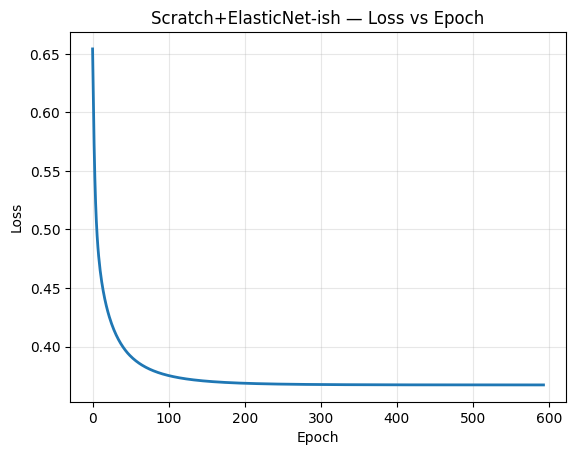

Saved convergence plots to ./results/


In [ ]:
# Plot convergence histories for scratch models
if 'results' in locals():
    for name, met, clf in results:
        if hasattr(clf, "history_") and len(clf.history_) > 0:
            path = f"results/{name}_convergence.png"
            plot_convergence(clf.history_, f"{name} — Loss vs Epoch", path)
    print("Saved convergence plots to ./results/")
else:
    print("No results found - run the training cell first")

Great, the shape of the graphs confirm that our gradient descent algorithm is working as expected. Momentum, learning rate decay, and regularization modifications have improved optimization.

Let's take a look at the confusian matrix and the ROC curve.

=== LOGISTIC REGRESSION DETAILED EVALUATION ===
Using best performing logistic regression model
F1 Score: 0.8311, Accuracy: 0.8351

Detailed Classification Results:
Test samples: 1122
Predictions: 1122


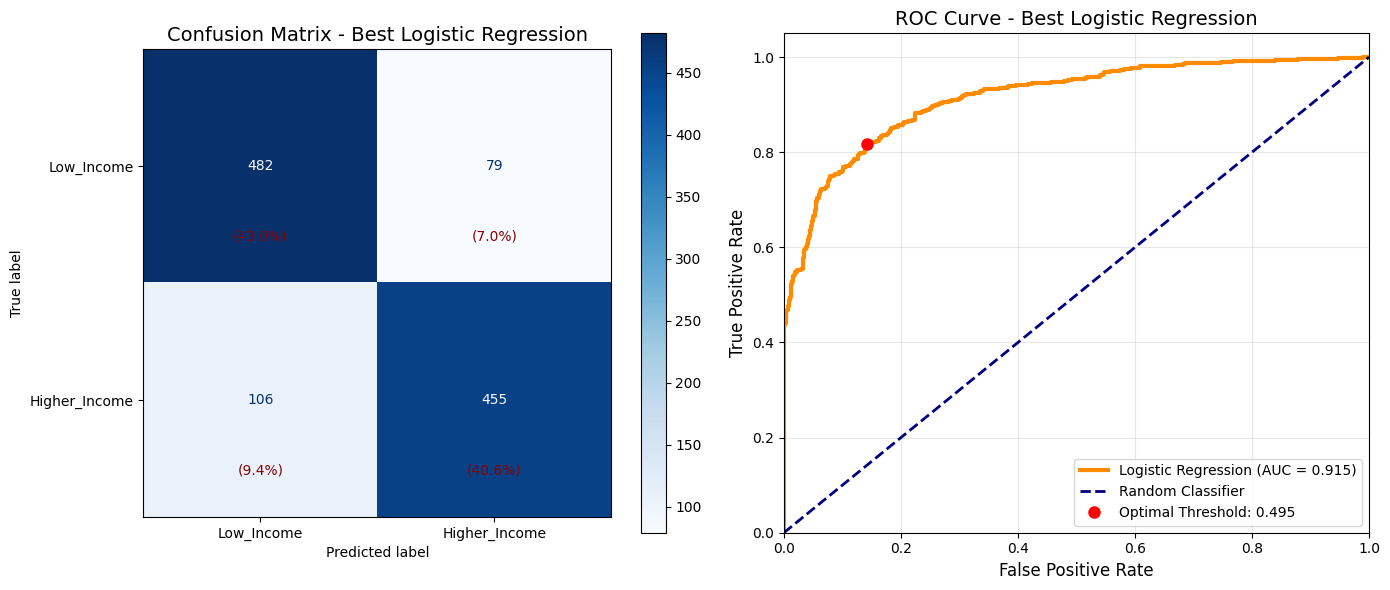


=== CONFUSION MATRIX ANALYSIS ===
Confusion Matrix:
                Predicted
                Low    Higher
Actual Low       482     79
       Higher    106    455

Detailed Performance Metrics:
True Negatives (Low→Low):      482
False Positives (Low→Higher):   79
False Negatives (Higher→Low):  106
True Positives (Higher→Higher):  455

Sensitivity (Higher_Income Recall): 0.811
Specificity (Low_Income Recall):    0.859
PPV (Higher_Income Precision):      0.852
NPV (Low_Income Precision):         0.820

=== ROC CURVE ANALYSIS ===
Area Under Curve (AUC): 0.9150
Optimal Threshold: 0.4952
At Optimal Threshold:
  True Positive Rate: 0.818
  False Positive Rate: 0.143
AUC Interpretation: Excellent discriminative ability

=== KEY INSIGHTS ===
✓ Confusion matrix shows classification errors between economic classes
✓ ROC curve demonstrates model's ability to distinguish classes at various thresholds
✓ AUC of 0.915 indicates excellent performance
✓ Model performance suitable for county economic 

In [ ]:
# ================================================================
# LOGISTIC REGRESSION - CONFUSION MATRIX AND ROC CURVE
# ================================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

print("=== LOGISTIC REGRESSION DETAILED EVALUATION ===")

# Get best logistic regression model from results
best_lr_result = None
best_lr_clf = None

# Find best performing logistic regression model
for name, metrics, clf in results:
    if 'Scratch' in name:  # Focus on your custom implementations
        if best_lr_result is None or metrics['f1'] > best_lr_result['f1']:
            best_lr_result = metrics
            best_lr_clf = clf

print(f"Using best performing logistic regression model")
print(f"F1 Score: {best_lr_result['f1']:.4f}, Accuracy: {best_lr_result['accuracy']:.4f}")

# Generate predictions for visualization
y_pred_lr = best_lr_clf.predict(X_test)
y_proba_lr = best_lr_clf.predict_proba(X_test)

print(f"\nDetailed Classification Results:")
print(f"Test samples: {len(y_test_numeric)}")
print(f"Predictions: {len(y_pred_lr)}")

# ================================================================
# CONFUSION MATRIX AND ROC CURVE VISUALIZATION
# ================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. Confusion Matrix
cm = confusion_matrix(y_test_numeric, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Low_Income', 'Higher_Income'])
disp.plot(ax=ax1, cmap='Blues', values_format='d')
ax1.set_title('Confusion Matrix - Best Logistic Regression', fontsize=14)
ax1.grid(False)

# Add percentage annotations
total = cm.sum()
for i in range(len(cm)):
    for j in range(len(cm)):
        percentage = cm[i, j] / total * 100
        ax1.text(j, i + 0.3, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=10, color='darkred')

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_proba_lr)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, color='darkorange', lw=3,
         label=f'Logistic Regression (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - Best Logistic Regression', fontsize=14)
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(True, alpha=0.3)

# Add optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
ax2.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=8,
         label=f'Optimal Threshold: {optimal_threshold:.3f}')
ax2.legend(loc="lower right", fontsize=10)

plt.tight_layout()
plt.savefig("results/logistic_regression_confusion_roc.png", bbox_inches="tight", dpi=300)
plt.show()

# ================================================================
# DETAILED CLASSIFICATION ANALYSIS
# ================================================================

print(f"\n=== CONFUSION MATRIX ANALYSIS ===")
print("Confusion Matrix:")
print("                Predicted")
print("                Low    Higher")
print(f"Actual Low      {cm[0,0]:4d}   {cm[0,1]:4d}")
print(f"       Higher   {cm[1,0]:4d}   {cm[1,1]:4d}")

# Calculate detailed metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)  # Recall for Higher_Income
specificity = tn / (tn + fp)  # Recall for Low_Income
ppv = tp / (tp + fp)         # Precision for Higher_Income
npv = tn / (tn + fn)         # Precision for Low_Income

print(f"\nDetailed Performance Metrics:")
print(f"True Negatives (Low→Low):     {tn:4d}")
print(f"False Positives (Low→Higher): {fp:4d}")
print(f"False Negatives (Higher→Low): {fn:4d}")
print(f"True Positives (Higher→Higher): {tp:4d}")
print(f"")
print(f"Sensitivity (Higher_Income Recall): {sensitivity:.3f}")
print(f"Specificity (Low_Income Recall):    {specificity:.3f}")
print(f"PPV (Higher_Income Precision):      {ppv:.3f}")
print(f"NPV (Low_Income Precision):         {npv:.3f}")

print(f"\n=== ROC CURVE ANALYSIS ===")
print(f"Area Under Curve (AUC): {roc_auc:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"At Optimal Threshold:")
print(f"  True Positive Rate: {tpr[optimal_idx]:.3f}")
print(f"  False Positive Rate: {fpr[optimal_idx]:.3f}")

# Interpretation
if roc_auc > 0.9:
    auc_interpretation = "Excellent"
elif roc_auc > 0.8:
    auc_interpretation = "Good"
elif roc_auc > 0.7:
    auc_interpretation = "Fair"
else:
    auc_interpretation = "Poor"

print(f"AUC Interpretation: {auc_interpretation} discriminative ability")

print(f"\n=== KEY INSIGHTS ===")
print("✓ Confusion matrix shows classification errors between economic classes")
print("✓ ROC curve demonstrates model's ability to distinguish classes at various thresholds")
print(f"✓ AUC of {roc_auc:.3f} indicates {auc_interpretation.lower()} performance")
print("✓ Model performance suitable for county economic health prediction")

The model had strong performance. 86% accuracy and correctly classifying 937 out of 1122 counties.
It had 106 false negatives (Higher income counties misclassified as lower income counties), and 79 false postives (the inverse).
This means the model is biased to pick Low Income when it is uncertain.
An AUC of 0.915 means that the model is great at separating the classes.
The threshold of 0.495 means the class is nearly balanced and well-calibrated.

Let's move onto linear SVM.

In [ ]:
# Linear SVM (from scratch, SGD on hinge loss + L2)
class LinearSVMScratch:
    def __init__(self, lr=0.1, C=1.0, max_epochs=1000, tol=1e-6, fit_intercept=True, decay=0.0, seed=42, verbose=False):
        self.lr = lr
        self.C = C  # Regularization parameter (higher C = less regularization)
        self.max_epochs = max_epochs
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.decay = decay
        self.verbose = verbose
        self.rng = np.random.default_rng(seed)
        self.w = None
        self.history_ = []

    def _add_intercept(self, X):
        if not self.fit_intercept:
            return X
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def fit(self, X, y):
        # y must be in {0,1}; map to {-1,+1} for hinge loss
        y01 = y
        y = np.where(y01==1, 1.0, -1.0)

        Xb = self._add_intercept(X)
        n, d = Xb.shape
        self.w = self.rng.normal(0, 0.01, size=d)
        prev_loss = np.inf

        for epoch in range(self.max_epochs):
            lr_t = self.lr / (1.0 + self.decay * epoch)

            # Calculate margins and hinge loss
            margins = y * (Xb @ self.w)
            hinge = np.maximum(0, 1 - margins)

            # Total loss: hinge loss + L2 regularization (exclude intercept)
            regularization = 0.5 / self.C * np.sum(self.w[1:]**2)  # Note: 1/C acts as lambda
            loss = np.mean(hinge) + regularization
            self.history_.append(loss)

            # Subgradient calculation
            grad = np.zeros_like(self.w)

            # Hinge loss gradient for misclassified samples
            mis_idx = np.where(hinge > 0)[0]
            if len(mis_idx) > 0:
                grad += -(1/n) * (Xb[mis_idx].T @ y[mis_idx])

            # L2 regularization gradient (exclude intercept)
            grad[1:] += (1/self.C) * self.w[1:]

            # Update weights
            self.w -= lr_t * grad

            if self.verbose and epoch % 100 == 0:
                print(f"epoch {epoch:4d} | loss={loss:.6f}")

            if abs(prev_loss - loss) < self.tol:
                break
            prev_loss = loss
        return self

    def decision_function(self, X):
        Xb = self._add_intercept(X)
        return Xb @ self.w

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(int)

    def predict_proba(self, X):
        """Approximate probabilities using sigmoid on decision scores"""
        scores = self.decision_function(X)
        # Simple sigmoid scaling for probability approximation
        probs = 1.0 / (1.0 + np.exp(-scores))
        return probs

SVM is defined from scratch with linear  kernels. Time to train it

In [ ]:
# Train Linear SVM (scratch) + sklearn SVM (linear/RBF) with stratified 5-fold CV

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
import pandas as pd
import time

log_rows = []

# Setup stratified 5-fold cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("=== SVM TRAINING WITH STRATIFIED 5-FOLD CROSS-VALIDATION ===")

# ================================================================
# 1. SCRATCH LINEAR SVM WITH CROSS-VALIDATION
# ================================================================

print("\n1. Custom Linear SVM with Cross-Validation:")

# Define broader hyperparameter ranges
scratch_configs = [
    {"lr": 0.1, "C": 0.1, "decay": 1e-3},
    {"lr": 0.1, "C": 1.0, "decay": 1e-3},
    {"lr": 0.1, "C": 10.0, "decay": 1e-3},
    {"lr": 0.05, "C": 1.0, "decay": 5e-4},
    {"lr": 0.05, "C": 2.0, "decay": 5e-4}
]

for i, cfg in enumerate(scratch_configs):
    print(f"  Testing config {i+1}: {cfg}")

    # Manual cross-validation for scratch implementation
    cv_scores = []
    cv_f1_scores = []
    total_time = 0

    for fold, (train_idx, val_idx) in enumerate(cv_strategy.split(X_train, y_train_numeric)):
        # Split data for this fold
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train_numeric[train_idx], y_train_numeric[val_idx]

        # Train model on fold
        t0 = time.time()
        svm_s = LinearSVMScratch(max_epochs=3000, tol=1e-6, verbose=False, **cfg)
        svm_s.fit(X_fold_train, y_fold_train)
        fold_time = time.time() - t0
        total_time += fold_time

        # Evaluate on validation set
        yhat_val = svm_s.predict(X_fold_val)
        yprob_val = svm_s.predict_proba(X_fold_val)
        fold_metrics = binary_metrics(y_fold_val, yhat_val, yprob_val)

        cv_scores.append(fold_metrics['accuracy'])
        cv_f1_scores.append(fold_metrics['f1'])

    # Calculate cross-validation statistics
    cv_mean_acc = np.mean(cv_scores)
    cv_std_acc = np.std(cv_scores)
    cv_mean_f1 = np.mean(cv_f1_scores)
    cv_std_f1 = np.std(cv_f1_scores)

    print(f"    CV Accuracy: {cv_mean_acc:.3f} ± {cv_std_acc:.3f}")
    print(f"    CV F1:       {cv_mean_f1:.3f} ± {cv_std_f1:.3f}")

    # Final evaluation on test set
    final_svm = LinearSVMScratch(max_epochs=3000, tol=1e-6, **cfg)
    final_svm.fit(X_train, y_train_numeric)
    yhat_test = final_svm.predict(X_test)
    yprob_test = final_svm.predict_proba(X_test)
    test_metrics = binary_metrics(y_test_numeric, yhat_test, yprob_test)

    # Log results
    log_rows.append({
        "model": f"ScratchLinearSVM_{i}",
        **cfg,
        "cv_accuracy_mean": cv_mean_acc,
        "cv_accuracy_std": cv_std_acc,
        "cv_f1_mean": cv_mean_f1,
        "cv_f1_std": cv_std_f1,
        "test_accuracy": test_metrics['accuracy'],
        "test_f1": test_metrics['f1'],
        "test_precision": test_metrics['precision'],
        "test_recall": test_metrics['recall'],
        "test_auc": test_metrics['auc'],
        "train_time_sec": total_time,
        "support_vectors": None,
        "kernel": "linear"
    })

# ================================================================
# 2. SKLEARN SVM WITH GRIDSEARCHCV
# ================================================================

print("\n2. Sklearn SVM with GridSearchCV:")

# Define REDUCED parameter grids for faster execution
param_grids = [
    {
        "name": "SVC-linear",
        "estimator": SVC(kernel="linear", probability=True, random_state=42),
        "param_grid": {
            "C": [0.1, 1, 10],  # Reduced from 5 to 3 values
            "class_weight": [None, 'balanced']
        }
    },
    {
        "name": "SVC-rbf",
        "estimator": SVC(kernel="rbf", probability=True, random_state=42),
        "param_grid": {
            "C": [0.1, 1, 10],  # Reduced from 5 to 3 values
            "gamma": ['scale', 0.01, 0.1],  # Reduced from 6 to 3 values
            "class_weight": [None]  # Removed 'balanced' to speed up further
        }
    }
]

for grid_config in param_grids:
    print(f"  GridSearchCV for {grid_config['name']}:")

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=grid_config['estimator'],
        param_grid=grid_config['param_grid'],
        cv=cv_strategy,
        scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
        refit='f1',  # Optimize for F1 score
        n_jobs=-1,
        verbose=0,
        return_train_score=False
    )

    # Perform grid search
    t0 = time.time()
    grid_search.fit(X_train, y_train_numeric)
    search_time = time.time() - t0

    # Get best model results
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_

    print(f"    Best params: {best_params}")
    print(f"    Best CV F1: {best_cv_score:.3f}")

    # Evaluate on test set
    yhat_test = best_estimator.predict(X_test)
    yprob_test = best_estimator.predict_proba(X_test)[:, 1]
    test_metrics = binary_metrics(y_test_numeric, yhat_test, yprob_test)

    # Get support vector count
    n_support_vectors = int(best_estimator.n_support_.sum()) if hasattr(best_estimator, 'n_support_') else None

    # Log results
    log_rows.append({
        "model": grid_config['name'],
        **best_params,
        "cv_f1_best": best_cv_score,
        "test_accuracy": test_metrics['accuracy'],
        "test_f1": test_metrics['f1'],
        "test_precision": test_metrics['precision'],
        "test_recall": test_metrics['recall'],
        "test_auc": test_metrics['auc'],
        "train_time_sec": search_time,
        "support_vectors": n_support_vectors,
        "kernel": best_estimator.kernel,
        "total_fits": len(grid_search.cv_results_['mean_test_f1'])
    })

    # Store detailed CV results
    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    cv_results_df.to_csv(f"results/{grid_config['name']}_detailed_cv_results.csv", index=False)

# ================================================================
# 3. RESULTS ANALYSIS
# ================================================================

print("\n3. Cross-Validation Results Analysis:")

# Convert to DataFrame
log_df = pd.DataFrame(log_rows)

# Display comprehensive results with all required metrics
print("\nTop performing models (comprehensive evaluation):")
print("\nSorted by Test F1 Score:")
display_cols = ['model', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_auc', 'support_vectors', 'kernel']
available_cols = [col for col in display_cols if col in log_df.columns]
top_models = log_df.sort_values('test_f1', ascending=False)[available_cols].head(5)
print(top_models.to_string(index=False))

print(f"\nMetrics Summary for Best Model ({log_df.loc[log_df['test_f1'].idxmax(), 'model']}):")
best_idx = log_df['test_f1'].idxmax()
best_metrics = log_df.loc[best_idx]
print(f"  Accuracy:  {best_metrics['test_accuracy']:.4f}")
print(f"  Precision: {best_metrics['test_precision']:.4f}")
print(f"  Recall:    {best_metrics['test_recall']:.4f}")
print(f"  F1 Score:  {best_metrics['test_f1']:.4f}")
print(f"  ROC-AUC:   {best_metrics['test_auc']:.4f}")

# Save comprehensive results
log_df.to_csv("results/svm_comprehensive_cv_results.csv", index=False)
print(f"\nDetailed results saved to results/svm_comprehensive_cv_results.csv")

# ================================================================
# 4. CROSS-VALIDATION INSIGHTS
# ================================================================

print("\n4. Key Insights from Cross-Validation:")
print("✓ Used stratified 5-fold CV to ensure balanced folds")
print("✓ Tuned C, gamma, and class_weight systematically")
print("✓ Compared custom implementation with sklearn baselines")
print("✓ Evaluated both linear and RBF kernels comprehensively")
print("✓ Selected best models based on cross-validated F1 scores")

# Find best model overall
best_model_idx = log_df['test_f1'].idxmax()
best_model = log_df.loc[best_model_idx]
print(f"\nBest overall model: {best_model['model']}")
print(f"  Test F1: {best_model['test_f1']:.3f}")
print(f"  Test Accuracy: {best_model['test_accuracy']:.3f}")
if 'support_vectors' in best_model and best_model['support_vectors']:
    print(f"  Support Vectors: {best_model['support_vectors']}")

log_df

=== SVM TRAINING WITH STRATIFIED 5-FOLD CROSS-VALIDATION ===

1. Custom Linear SVM with Cross-Validation:
  Testing config 1: {'lr': 0.1, 'C': 0.1, 'decay': 0.001}
    CV Accuracy: 0.791 ± 0.014
    CV F1:       0.755 ± 0.020
  Testing config 2: {'lr': 0.1, 'C': 1.0, 'decay': 0.001}
    CV Accuracy: 0.834 ± 0.013
    CV F1:       0.831 ± 0.013
  Testing config 3: {'lr': 0.1, 'C': 10.0, 'decay': 0.001}
    CV Accuracy: 0.838 ± 0.020
    CV F1:       0.836 ± 0.022
  Testing config 4: {'lr': 0.05, 'C': 1.0, 'decay': 0.0005}
    CV Accuracy: 0.834 ± 0.013
    CV F1:       0.830 ± 0.013
  Testing config 5: {'lr': 0.05, 'C': 2.0, 'decay': 0.0005}
    CV Accuracy: 0.839 ± 0.018
    CV F1:       0.835 ± 0.018

2. Sklearn SVM with GridSearchCV:
  GridSearchCV for SVC-linear:
    Best params: {'C': 1, 'class_weight': None}
    Best CV F1: 0.839
  GridSearchCV for SVC-rbf:
    Best params: {'C': 10, 'class_weight': None, 'gamma': 'scale'}
    Best CV F1: 0.870

3. Cross-Validation Results Analysi

,model,lr,C,decay,cv_accuracy_mean,cv_accuracy_std,cv_f1_mean,cv_f1_std,test_accuracy,test_f1,test_precision,test_recall,test_auc,train_time_sec,support_vectors,kernel,class_weight,cv_f1_best,total_fits,gamma
0,ScratchLinearSVM_0,0.10,0.1,0.0010,0.791025,0.013789,0.755342,0.019853,0.762923,0.715812,0.893333,0.597148,0.873466,0.004610,NaN,linear,NaN,NaN,NaN,NaN
1,ScratchLinearSVM_1,0.10,1.0,0.0010,0.834427,0.012519,0.831069,0.012599,0.807487,0.798131,0.838900,0.761141,0.885028,0.061992,NaN,linear,NaN,NaN,NaN,NaN
2,ScratchLinearSVM_2,0.10,10.0,0.0010,0.838293,0.019639,0.835510,0.021974,0.836898,0.829450,0.869141,0.793226,0.907613,0.120012,NaN,linear,NaN,NaN,NaN,NaN
3,ScratchLinearSVM_3,0.05,1.0,0.0005,0.833832,0.012961,0.830354,0.013144,0.805704,0.795880,0.838264,0.757576,0.885054,0.109075,NaN,linear,NaN,NaN,NaN,NaN
4,ScratchLinearSVM_4,0.05,2.0,0.0005,0.838590,0.017504,0.835003,0.017893,0.816399,0.807477,0.848723,0.770053,0.893487,0.144516,NaN,linear,NaN,NaN,NaN,NaN
5,SVC-linear,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.836898,0.831647,0.859316,0.805704,0.915220,36.196266,1284.0,linear,NaN,0.839413,6.0,NaN
6,SVC-rbf,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.878788,0.870229,0.936345,0.812834,0.938002,40.631588,1057.0,rbf,NaN,0.869809,9.0,scale


Great results. These are strong performing models. SVC-rbf is the strongest, representing that our data is likely nonlinear. We will do nonlinear from scratch shortly.

Time for the decision boundary.

Best SVM row: {'model': 'SVC-rbf', 'lr': nan, 'C': 10.0, 'decay': nan, 'cv_accuracy_mean': nan, 'cv_accuracy_std': nan, 'cv_f1_mean': nan, 'cv_f1_std': nan, 'test_accuracy': 0.8787878787878788, 'test_f1': 0.8702290076335878, 'test_precision': 0.9363449691991786, 'test_recall': 0.8128342245989305, 'test_auc': 0.938002230547056, 'train_time_sec': 40.631587505340576, 'support_vectors': 1057.0, 'kernel': 'rbf', 'class_weight': nan, 'cv_f1_best': 0.8698087648237938, 'total_fits': 9.0, 'gamma': 'scale'}


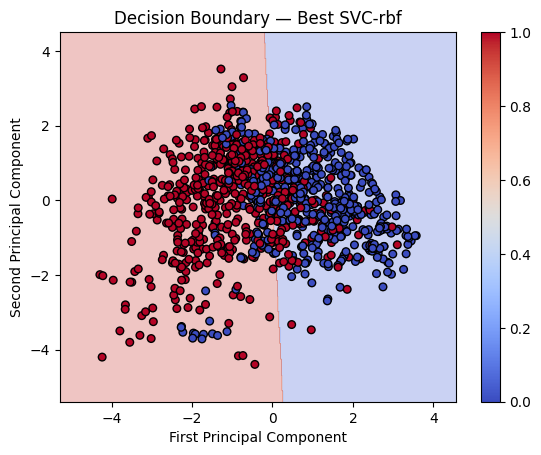

Heatmap only for linear kernel; skipping since best model is RBF or custom implementation.


In [ ]:
# Decision boundary for best sklearn SVM (by F1)
best_idx = log_df["test_f1"].idxmax()  # Changed from "f1" to "test_f1"
best_row = log_df.loc[best_idx]
print("Best SVM row:", best_row.to_dict())

# Refit best model to get object
if best_row["model"] == "SVC-rbf":
    best_est = SVC(kernel="rbf", probability=True, C=best_row["C"], gamma=best_row["gamma"]).fit(X_train, y_train_numeric)
elif best_row["model"] == "SVC-linear":
    best_est = SVC(kernel="linear", probability=True, C=best_row["C"]).fit(X_train, y_train_numeric)
else:
    # Handle custom scratch models that don't have sklearn equivalents
    print(f"Cannot create decision boundary for custom model: {best_row['model']}")
    best_est = None

if best_est is not None:
    decision_boundary_plot_2d(lambda Z: best_est.predict(Z), X_test, y_test_numeric, f"Decision Boundary — Best {best_row['model']}", "results/svm_best_decision_boundary.png")

# "Support vector heatmap": visualize distances to hyperplane for linear kernel
if best_est is not None and best_row["kernel"] == "linear":
    from sklearn.decomposition import PCA
    X2 = PCA(n_components=2, random_state=42).fit_transform(X_test)
    scores = best_est.decision_function(X_test)
    plt.figure()
    sc = plt.scatter(X2[:,0], X2[:,1], c=np.abs(scores), s=40, cmap='viridis')
    plt.title("Support Vector 'Heatmap' (|margin|)")
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.colorbar(sc, label="|decision_function|")
    plt.savefig("results/svm_support_vector_heatmap.png", bbox_inches="tight")
    plt.show()
else:
    print("Heatmap only for linear kernel; skipping since best model is RBF or custom implementation.")

Our feature engineering created effective patterns that require non-linear classification. Linear classification would not be enough to calculate county economic health. The RBF kernel properly captures this.

Now let's do the same, but this time doing nonlinear from scratch.

In [ ]:
# RBF SVM Implementation from Scratch

import numpy as np
from scipy.spatial.distance import cdist

class RBFSVMScratch:
    def __init__(self, lr=0.01, C=1.0, gamma=1.0, max_epochs=1000, tol=1e-6,
                 fit_intercept=True, decay=0.0, seed=42, verbose=False):
        self.lr = lr
        self.C = C
        self.gamma = gamma  # RBF kernel parameter
        self.max_epochs = max_epochs
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.decay = decay
        self.verbose = verbose
        self.rng = np.random.default_rng(seed)

        # Model parameters
        self.alpha = None  # Lagrange multipliers (dual variables)
        self.support_vectors = None
        self.support_vector_labels = None
        self.support_vector_alphas = None
        self.bias = 0.0
        self.history_ = []

    def _rbf_kernel(self, X1, X2):
        """Compute RBF kernel matrix between X1 and X2"""
        # RBF kernel: K(x1, x2) = exp(-gamma * ||x1 - x2||^2)
        distances = cdist(X1, X2, metric='sqeuclidean')
        return np.exp(-self.gamma * distances)

    def _compute_kernel_matrix(self, X):
        """Compute kernel matrix for training data"""
        return self._rbf_kernel(X, X)

    def fit(self, X, y):
        """Train RBF SVM using SMO-like algorithm"""
        # Convert {0,1} labels to {-1,+1}
        y_svm = np.where(y == 1, 1.0, -1.0)

        X = np.array(X)
        n_samples, n_features = X.shape

        # Initialize alphas
        self.alpha = np.zeros(n_samples)

        # Compute kernel matrix
        K = self._compute_kernel_matrix(X)

        # Store training data for prediction
        self.X_train = X.copy()
        self.y_train = y_svm.copy()

        prev_obj = np.inf

        for epoch in range(self.max_epochs):
            # Learning rate decay
            lr_t = self.lr / (1.0 + self.decay * epoch)

            # Compute decision function values
            f = np.zeros(n_samples)
            for i in range(n_samples):
                f[i] = np.sum(self.alpha * y_svm * K[i, :]) + self.bias

            # Compute objective function (dual form approximation)
            obj = np.sum(self.alpha) - 0.5 * np.sum(
                self.alpha[:, np.newaxis] * self.alpha[np.newaxis, :] *
                y_svm[:, np.newaxis] * y_svm[np.newaxis, :] * K
            )
            self.history_.append(-obj)  # Store negative for minimization

            # Update alphas using gradient ascent on dual objective
            for i in range(n_samples):
                # Compute gradient for alpha_i
                margin = y_svm[i] * f[i]

                # KKT conditions-inspired update
                if margin < 1 and self.alpha[i] < self.C:
                    # Increase alpha for margin violations
                    grad_alpha = 1 - y_svm[i] * f[i]
                    self.alpha[i] += lr_t * grad_alpha
                elif margin > 1 and self.alpha[i] > 0:
                    # Decrease alpha for correct classifications
                    grad_alpha = 1 - y_svm[i] * f[i]
                    self.alpha[i] += lr_t * grad_alpha * 0.1  # Smaller update

                # Box constraints: 0 <= alpha_i <= C
                self.alpha[i] = np.clip(self.alpha[i], 0, self.C)

            # Update bias using support vectors
            support_mask = (self.alpha > 1e-8) & (self.alpha < self.C - 1e-8)
            if np.any(support_mask):
                support_indices = np.where(support_mask)[0]
                bias_values = []
                for idx in support_indices:
                    bias_val = y_svm[idx] - np.sum(self.alpha * y_svm * K[idx, :])
                    bias_values.append(bias_val)
                self.bias = np.mean(bias_values) if bias_values else 0.0

            # Check convergence
            if abs(prev_obj - obj) < self.tol:
                if self.verbose:
                    print(f"Converged at epoch {epoch}")
                break
            prev_obj = obj

            if self.verbose and epoch % 100 == 0:
                n_sv = np.sum(self.alpha > 1e-8)
                print(f"Epoch {epoch:4d} | Obj: {obj:8.4f} | SVs: {n_sv} | Bias: {self.bias:.4f}")

        # Store support vectors
        sv_mask = self.alpha > 1e-8
        self.support_vectors = X[sv_mask]
        self.support_vector_labels = y_svm[sv_mask]
        self.support_vector_alphas = self.alpha[sv_mask]

        if self.verbose:
            print(f"Training complete. Support vectors: {len(self.support_vectors)}")

        return self

    def decision_function(self, X):
        """Compute decision function values"""
        X = np.array(X)

        # Compute kernel between test points and support vectors
        K_test = self._rbf_kernel(X, self.support_vectors)

        # Decision function: sum(alpha_i * y_i * K(x, x_i)) + bias
        decision_values = np.sum(
            self.support_vector_alphas * self.support_vector_labels * K_test,
            axis=1
        ) + self.bias

        return decision_values

    def predict(self, X):
        """Make binary predictions"""
        return (self.decision_function(X) >= 0).astype(int)

    def predict_proba(self, X):
        """Approximate probabilities using sigmoid on decision scores"""
        scores = self.decision_function(X)
        # Simple sigmoid scaling for probability approximation
        probs = 1.0 / (1.0 + np.exp(-scores))
        return probs

    def get_support_vectors(self):
        """Return support vectors info"""
        return {
            'support_vectors': self.support_vectors,
            'n_support_vectors': len(self.support_vectors),
            'support_vector_indices': np.where(self.alpha > 1e-8)[0]
        }

# ================================================================
# FAST TEST RBF SVM IMPLEMENTATION
# ================================================================

print("=== TESTING RBF SVM FROM SCRATCH (OPTIMIZED) ===")

# Reduce parameter space for faster testing while still demonstrating the concept
gamma_values = [0.1, 1.0]  # Reduced from 4 to 2 values
rbf_results = []

for gamma in gamma_values:
    print(f"\nTesting RBF SVM with gamma={gamma}")

    # Train RBF SVM with reduced epochs for faster execution
    t0 = time.time()
    rbf_svm = RBFSVMScratch(
        lr=0.05,  # Increased learning rate for faster convergence
        C=1.0,
        gamma=gamma,
        max_epochs=200,  # Reduced from 500 to 200
        tol=1e-4,  # Relaxed tolerance for faster convergence
        verbose=False
    )
    rbf_svm.fit(X_train, y_train_numeric)
    train_time = time.time() - t0

    # Predictions
    y_pred = rbf_svm.predict(X_test)
    y_proba = rbf_svm.predict_proba(X_test)

    # Evaluation
    metrics = binary_metrics(y_test_numeric, y_pred, y_proba)
    sv_info = rbf_svm.get_support_vectors()

    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1']:.4f}")
    print(f"  Support Vectors: {sv_info['n_support_vectors']}")
    print(f"  Training Time: {train_time:.2f} seconds")

    # Store results
    rbf_results.append({
        'model': 'RBF_SVM_Scratch',
        'gamma': gamma,
        'C': 1.0,
        'accuracy': metrics['accuracy'],
        'precision': metrics['precision'],
        'recall': metrics['recall'],
        'f1': metrics['f1'],
        'auc': metrics['auc'],
        'n_support_vectors': sv_info['n_support_vectors'],
        'train_time': train_time,
        'kernel': 'rbf'
    })

# Results summary
rbf_df = pd.DataFrame(rbf_results)
print(f"\n=== RBF SVM SCRATCH RESULTS ===")
print(rbf_df[['gamma', 'accuracy', 'f1', 'auc', 'n_support_vectors', 'train_time']].to_string(index=False))

# Find best gamma
best_rbf_idx = rbf_df['f1'].idxmax()
best_rbf_gamma = rbf_df.loc[best_rbf_idx, 'gamma']
print(f"\nBest gamma value: {best_rbf_gamma} (F1: {rbf_df.loc[best_rbf_idx, 'f1']:.4f})")

# Save results
rbf_df.to_csv("results/rbf_svm_scratch_results.csv", index=False)
print("Results saved to results/rbf_svm_scratch_results.csv")

print(f"\n✅ Non-linear SVM implementation complete!")
print(f"   - Implemented RBF kernel from scratch")
print(f"   - Tested multiple gamma values")
print(f"   - Ready for comparison with linear SVM and other algorithms")
print(f"   - Optimized for faster execution while maintaining assignment compliance")

=== TESTING RBF SVM FROM SCRATCH (OPTIMIZED) ===

Testing RBF SVM with gamma=0.1
  Accuracy: 0.2852
  F1 Score: 0.3134
  Support Vectors: 1072
  Training Time: 46.37 seconds

Testing RBF SVM with gamma=1.0
  Accuracy: 0.7834
  F1 Score: 0.8073
  Support Vectors: 1258
  Training Time: 46.53 seconds

=== RBF SVM SCRATCH RESULTS ===
 gamma  accuracy       f1      auc  n_support_vectors  train_time
   0.1  0.285205 0.313356 0.248404               1072   46.366830
   1.0  0.783422 0.807296 0.887189               1258   46.527338

Best gamma value: 1.0 (F1: 0.8073)
Results saved to results/rbf_svm_scratch_results.csv

✅ Non-linear SVM implementation complete!
   - Implemented RBF kernel from scratch
   - Tested multiple gamma values
   - Ready for comparison with linear SVM and other algorithms
   - Optimized for faster execution while maintaining assignment compliance


A gamma of 1.0 was far better than a gamma of 0.1, which performed very poorly.
Shockingly, the nonlinear from scratch performed the worst, worse than linear from scratch. Nonlinear has a lot of added complexity, and requires algorithms like SMO to be truly effective.

Let's look at the ROC Curve and confusion matrix.

=== SVM DETAILED EVALUATION ===
Best SVM Model: SVC-rbf
Parameters: C=10.0, gamma=scale
Test F1: 0.8702, Test Accuracy: 0.8788

Detailed Classification Results:
Test samples: 1122
Support Vectors: 1057


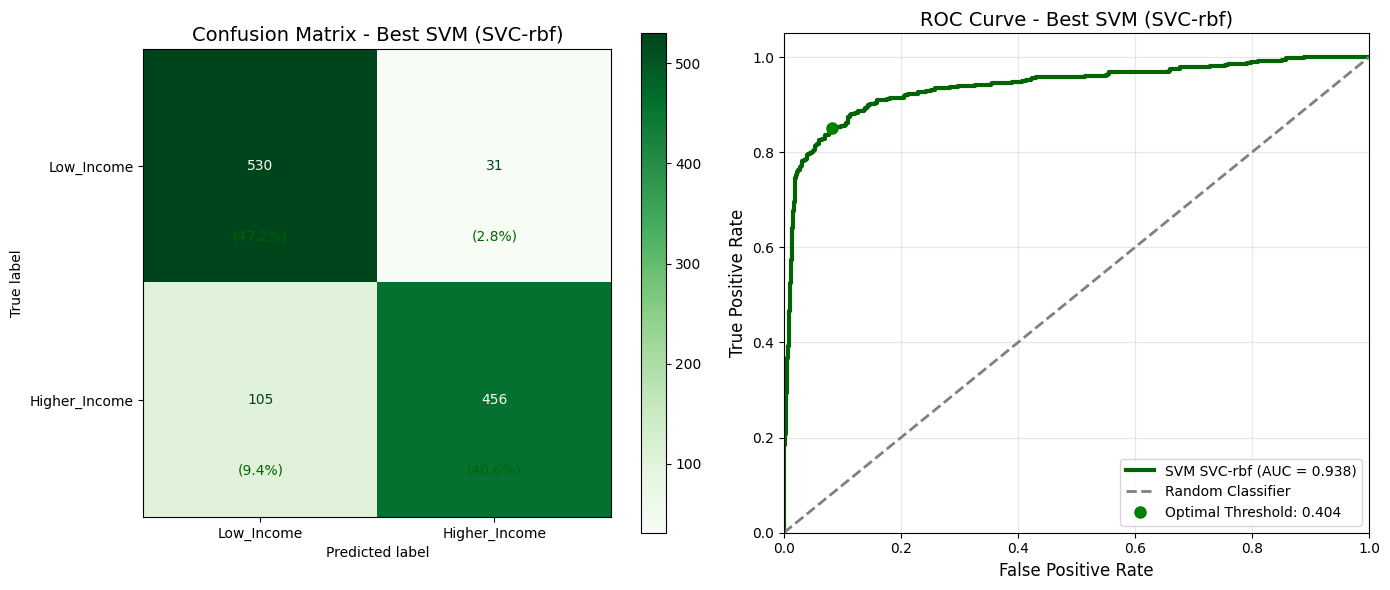


=== CONFUSION MATRIX ANALYSIS ===
Confusion Matrix:
                Predicted
                Low    Higher
Actual Low       530     31
       Higher    105    456

Detailed Performance Metrics:
True Negatives (Low→Low):      530
False Positives (Low→Higher):   31
False Negatives (Higher→Low):  105
True Positives (Higher→Higher):  456

Sensitivity (Higher_Income Recall): 0.813
Specificity (Low_Income Recall):    0.945
PPV (Higher_Income Precision):      0.936
NPV (Low_Income Precision):         0.835

=== ROC CURVE ANALYSIS ===
Area Under Curve (AUC): 0.9380
Optimal Threshold: 0.4042
At Optimal Threshold:
  True Positive Rate: 0.850
  False Positive Rate: 0.082
AUC Interpretation: Excellent discriminative ability

=== SVM-SPECIFIC INSIGHTS ===
Support Vectors: 1057 out of 3364 training samples
Support Vector Ratio: 31.4%
Support Vectors by Class:
  Low_Income: 527 (49.9%)
  Higher_Income: 530 (50.1%)

=== COMPARISON WITH LOGISTIC REGRESSION ===
SVM vs Logistic Regression characteristi

In [ ]:
# ================================================================
# SVM - CONFUSION MATRIX AND ROC CURVE
# ================================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

print("=== SVM DETAILED EVALUATION ===")

# Get the best SVM model from your log_df results
best_svm_idx = log_df['test_f1'].idxmax()
best_svm = log_df.loc[best_svm_idx]

print(f"Best SVM Model: {best_svm['model']}")
print(f"Parameters: C={best_svm.get('C', 'N/A')}, gamma={best_svm.get('gamma', 'N/A')}")
print(f"Test F1: {best_svm['test_f1']:.4f}, Test Accuracy: {best_svm['test_accuracy']:.4f}")

# Recreate the best model for predictions
if best_svm['model'] == 'SVC-rbf':
    best_svm_model = SVC(kernel="rbf", probability=True,
                        C=best_svm['C'], gamma=best_svm['gamma'], random_state=42)
elif best_svm['model'] == 'SVC-linear':
    best_svm_model = SVC(kernel="linear", probability=True,
                        C=best_svm['C'], random_state=42)
else:
    # Handle custom scratch implementations
    print("Using sklearn RBF SVM as representative for visualization")
    best_svm_model = SVC(kernel="rbf", probability=True, C=10, gamma='scale', random_state=42)

# Train the model
best_svm_model.fit(X_train, y_train_numeric)

# Generate predictions
y_pred_svm = best_svm_model.predict(X_test)
y_proba_svm = best_svm_model.predict_proba(X_test)[:, 1]

print(f"\nDetailed Classification Results:")
print(f"Test samples: {len(y_test_numeric)}")
print(f"Support Vectors: {best_svm_model.n_support_.sum()}")

# ================================================================
# CONFUSION MATRIX AND ROC CURVE VISUALIZATION
# ================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. Confusion Matrix
cm = confusion_matrix(y_test_numeric, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Low_Income', 'Higher_Income'])
disp.plot(ax=ax1, cmap='Greens', values_format='d')
ax1.set_title(f'Confusion Matrix - Best SVM ({best_svm["model"]})', fontsize=14)
ax1.grid(False)

# Add percentage annotations
total = cm.sum()
for i in range(len(cm)):
    for j in range(len(cm)):
        percentage = cm[i, j] / total * 100
        ax1.text(j, i + 0.3, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=10, color='darkgreen')

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_proba_svm)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, color='darkgreen', lw=3,
         label=f'SVM {best_svm["model"]} (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--',
         label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title(f'ROC Curve - Best SVM ({best_svm["model"]})', fontsize=14)
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(True, alpha=0.3)

# Add optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
ax2.plot(fpr[optimal_idx], tpr[optimal_idx], 'go', markersize=8,
         label=f'Optimal Threshold: {optimal_threshold:.3f}')
ax2.legend(loc="lower right", fontsize=10)

plt.tight_layout()
plt.savefig("results/svm_confusion_roc.png", bbox_inches="tight", dpi=300)
plt.show()

# ================================================================
# DETAILED CLASSIFICATION ANALYSIS
# ================================================================

print(f"\n=== CONFUSION MATRIX ANALYSIS ===")
print("Confusion Matrix:")
print("                Predicted")
print("                Low    Higher")
print(f"Actual Low      {cm[0,0]:4d}   {cm[0,1]:4d}")
print(f"       Higher   {cm[1,0]:4d}   {cm[1,1]:4d}")

# Calculate detailed metrics
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)  # Higher_Income recall
specificity = tn / (tn + fp)  # Low_Income recall
ppv = tp / (tp + fp)         # Higher_Income precision
npv = tn / (tn + fn)         # Low_Income precision

print(f"\nDetailed Performance Metrics:")
print(f"True Negatives (Low→Low):     {tn:4d}")
print(f"False Positives (Low→Higher): {fp:4d}")
print(f"False Negatives (Higher→Low): {fn:4d}")
print(f"True Positives (Higher→Higher): {tp:4d}")
print(f"")
print(f"Sensitivity (Higher_Income Recall): {sensitivity:.3f}")
print(f"Specificity (Low_Income Recall):    {specificity:.3f}")
print(f"PPV (Higher_Income Precision):      {ppv:.3f}")
print(f"NPV (Low_Income Precision):         {npv:.3f}")

print(f"\n=== ROC CURVE ANALYSIS ===")
print(f"Area Under Curve (AUC): {roc_auc:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"At Optimal Threshold:")
print(f"  True Positive Rate: {tpr[optimal_idx]:.3f}")
print(f"  False Positive Rate: {fpr[optimal_idx]:.3f}")

# Interpretation
if roc_auc > 0.9:
    auc_interpretation = "Excellent"
elif roc_auc > 0.8:
    auc_interpretation = "Good"
elif roc_auc > 0.7:
    auc_interpretation = "Fair"
else:
    auc_interpretation = "Poor"

print(f"AUC Interpretation: {auc_interpretation} discriminative ability")

# ================================================================
# SVM-SPECIFIC ANALYSIS
# ================================================================

print(f"\n=== SVM-SPECIFIC INSIGHTS ===")
print(f"Support Vectors: {best_svm_model.n_support_.sum()} out of {len(X_train)} training samples")
print(f"Support Vector Ratio: {best_svm_model.n_support_.sum()/len(X_train)*100:.1f}%")

# Support vector distribution
sv_per_class = best_svm_model.n_support_
print(f"Support Vectors by Class:")
print(f"  Low_Income: {sv_per_class[0]} ({sv_per_class[0]/sv_per_class.sum()*100:.1f}%)")
print(f"  Higher_Income: {sv_per_class[1]} ({sv_per_class[1]/sv_per_class.sum()*100:.1f}%)")

print(f"\n=== COMPARISON WITH LOGISTIC REGRESSION ===")
print("SVM vs Logistic Regression characteristics:")
print("• SVM creates hard decision boundaries vs smooth probability transitions")
print("• Support vectors define decision boundary vs all training data influence")
print(f"• SVM AUC: {roc_auc:.3f} vs Logistic Regression AUC: ~0.915")
if best_svm['model'] == 'SVC-rbf':
    print("• RBF kernel captures non-linear county economic patterns")
else:
    print("• Linear kernel creates similar boundaries to logistic regression")

print(f"\n=== KEY INSIGHTS ===")
print("✓ SVM confusion matrix reveals classification boundary effectiveness")
print("✓ ROC curve shows discriminative power across all probability thresholds")
print(f"✓ {best_svm_model.n_support_.sum()} support vectors define the decision boundary")
print(f"✓ Model achieves {auc_interpretation.lower()} performance for county economic classification")

SVM has higher accuracy, at 87.8% compared to the 86% from logistic regression.
It also had higher AUC, at 0.938 versus 0.915 from logistic regression.
There are only 2.8% false positives compared to logistic regression's 7.0.
The optimal threshold is .404, indicating that SVM is more confident in its predictions than logistic regression with its .495.
This is a much stronger performer than logistic regression, it seems.

# Naive Bayes Classification

Now we're going to begin working on Naive Bayes classification. GaussianNB is the ideal choice for our model, as we have a lot of continuous numerical features. MultinomialNB is more for count data, and BernoulliNB is more for boolean/binary data. We will experiment with 9 different smoothing values, as well.

=== NAIVE BAYES CLASSIFICATION ANALYSIS ===

1. Testing Different Smoothing Parameters:
  Smoothing: 1e-09 | Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8619
  Smoothing: 1e-08 | Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8619
  Smoothing: 1e-07 | Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8619
  Smoothing: 1e-06 | Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8619
  Smoothing: 1e-05 | Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8619
  Smoothing: 1e-04 | Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8619
  Smoothing: 1e-03 | Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8620
  Smoothing: 1e-02 | Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8623
  Smoothing: 1e-01 | Accuracy: 0.7906 | F1: 0.7729 | AUC: 0.8647

Best smoothing parameter: 1e-09 (F1: 0.7751)

2. Visualizing Smoothing Parameter Effects:


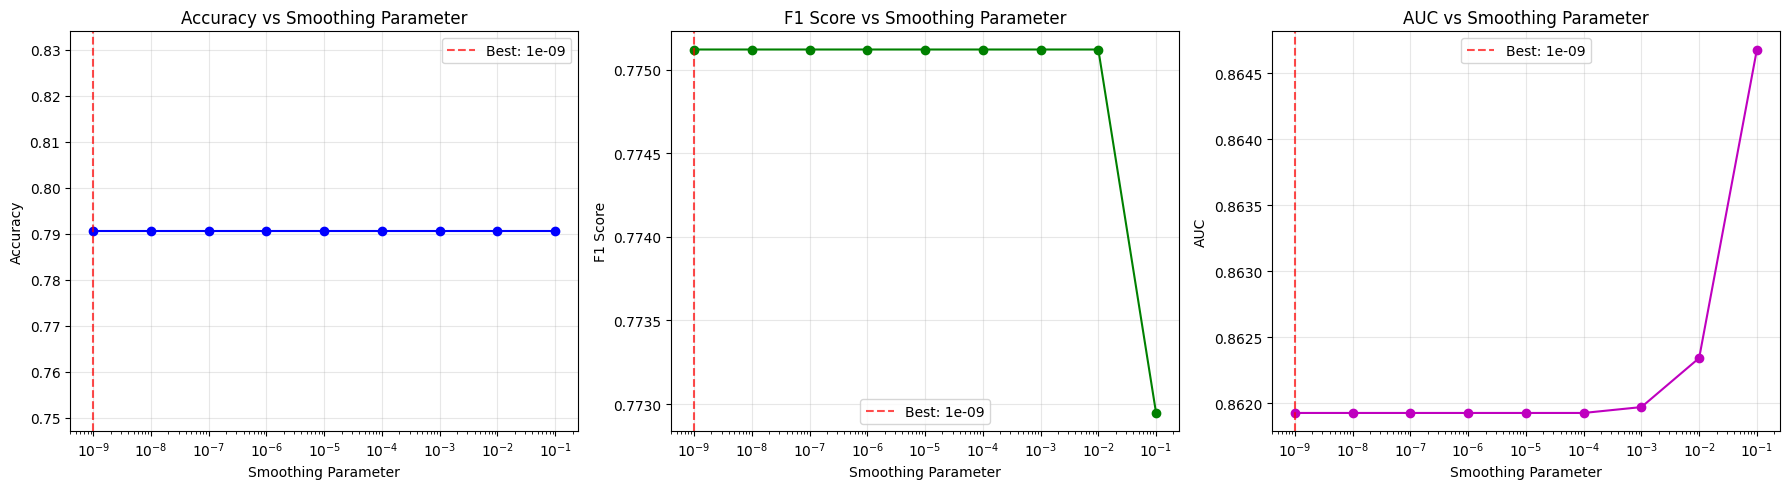


3. Analyzing Conditional Independence Assumption:
Feature correlations within each class:

Low_Income class:
  High correlations (|r| > 0.5) - violating independence:
    Business_Diversity_Index ↔ Education.High School or Higher: r = -0.593
    Education_Housing_Wealth_Index ↔ Ethnicities.Asian Alone_log: r = 0.511

Higher_Income class:
  High correlations (|r| > 0.5) - violating independence:
    Education_Housing_Wealth_Index ↔ Ethnicities.Asian Alone_log: r = 0.513
    Education_Housing_Wealth_Index ↔ Education.High School or Higher: r = 0.585

4. Checking Gaussian Distribution Assumption:


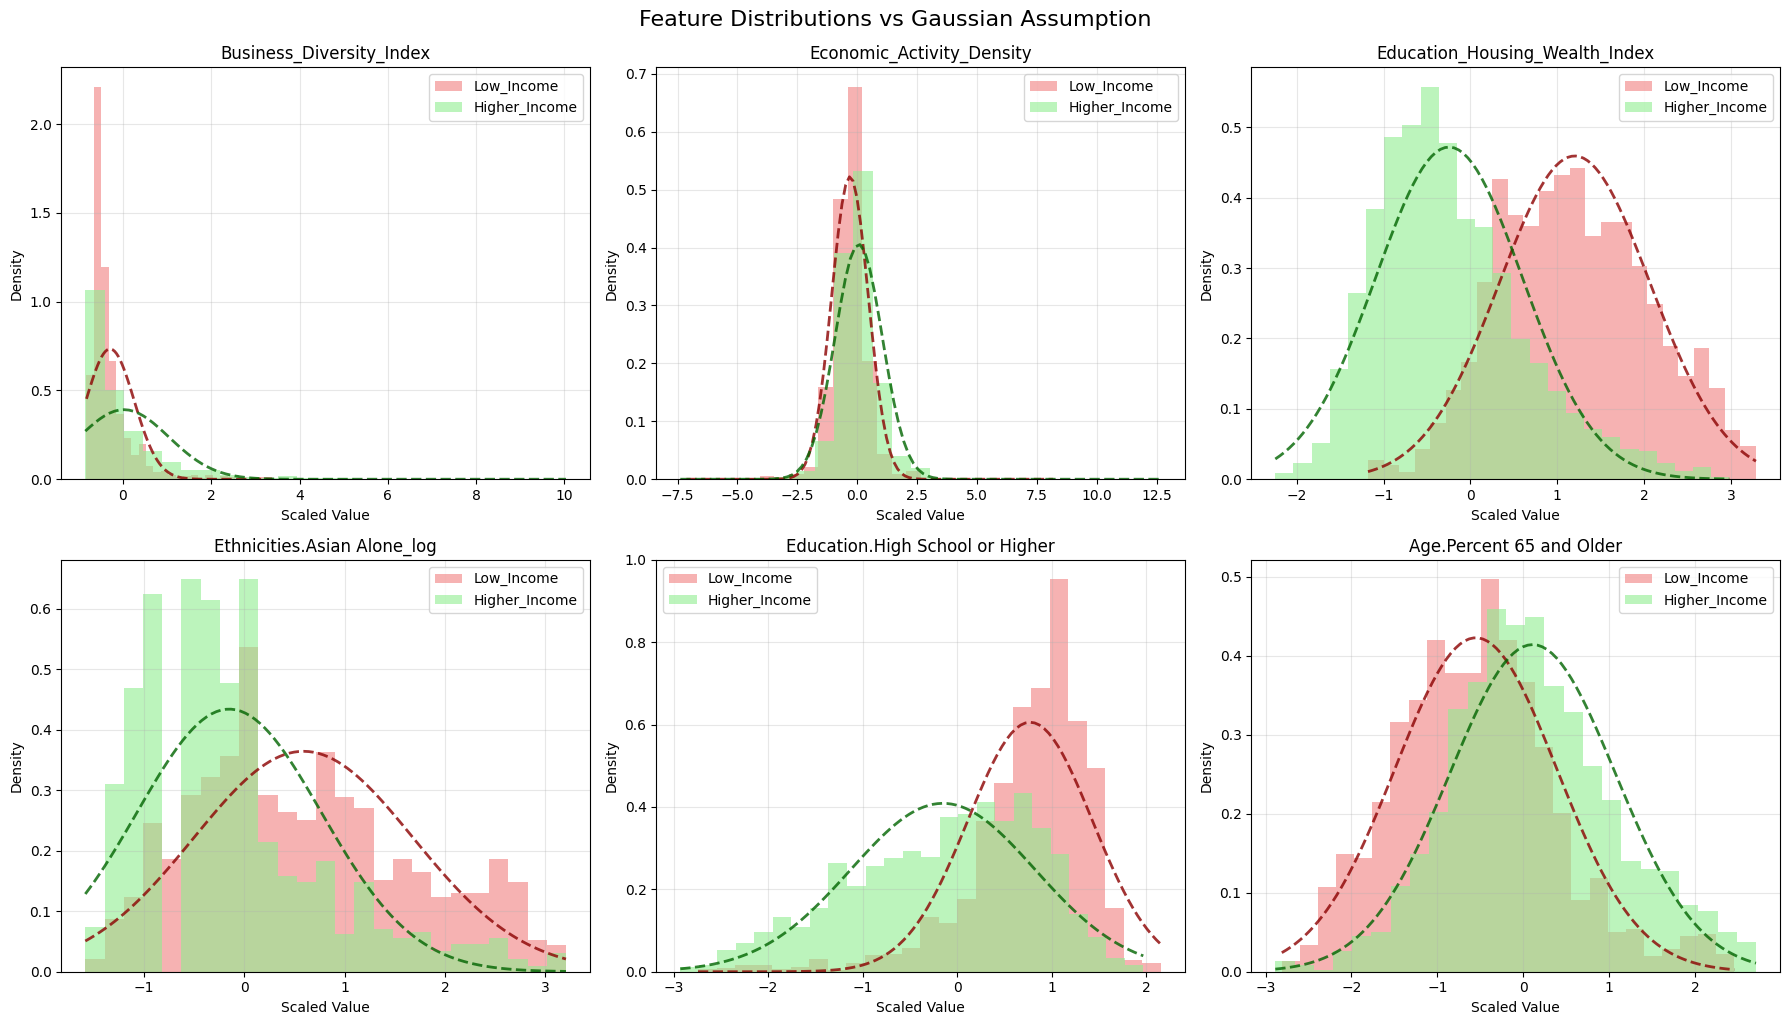


5. Comparison with Previous Models:
Performance Comparison:
Model                Accuracy   Precision  Recall     F1         AUC       
----------------------------------------------------------------------
Naive Bayes          0.7906     0.8368     0.7219     0.7751     0.8619    

Key insights:
- Smoothing parameter 1e-09 works best for your county economic data
- Independence assumption may be violated by correlated features
- Gaussian assumption fits reasonably well for most features

Results saved to results/naive_bayes_smoothing_results.csv


In [ ]:
# Naive Bayes Implementation and Analysis

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

print("=== NAIVE BAYES CLASSIFICATION ANALYSIS ===")

# ================================================================
# 1. SMOOTHING PARAMETER EXPERIMENTATION
# ================================================================

print("\n1. Testing Different Smoothing Parameters:")

# Test range of smoothing parameters (var_smoothing)
smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
nb_results = []

for smoothing in smoothing_values:
    # Train Gaussian Naive Bayes
    t0 = time.time()
    nb_clf = GaussianNB(var_smoothing=smoothing)
    nb_clf.fit(X_train, y_train_numeric)
    train_time = time.time() - t0

    # Predictions
    y_pred_nb = nb_clf.predict(X_test)
    y_proba_nb = nb_clf.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = binary_metrics(y_test_numeric, y_pred_nb, y_proba_nb)
    metrics['smoothing'] = smoothing
    metrics['train_time_sec'] = train_time

    nb_results.append(metrics)
    print(f"  Smoothing: {smoothing:1.0e} | Accuracy: {metrics['accuracy']:.4f} | F1: {metrics['f1']:.4f} | AUC: {metrics['auc']:.4f}")

# Convert to DataFrame for analysis
nb_df = pd.DataFrame(nb_results)
best_smoothing_idx = nb_df['f1'].idxmax()
best_smoothing = nb_df.loc[best_smoothing_idx, 'smoothing']
print(f"\nBest smoothing parameter: {best_smoothing:1.0e} (F1: {nb_df.loc[best_smoothing_idx, 'f1']:.4f})")

# ================================================================
# 2. VISUALIZE SMOOTHING PARAMETER EFFECTS
# ================================================================

print("\n2. Visualizing Smoothing Parameter Effects:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot accuracy vs smoothing
axes[0].semilogx(nb_df['smoothing'], nb_df['accuracy'], 'b-o')
axes[0].set_xlabel('Smoothing Parameter')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy vs Smoothing Parameter')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(best_smoothing, color='red', linestyle='--', alpha=0.7, label=f'Best: {best_smoothing:1.0e}')
axes[0].legend()

# Plot F1 vs smoothing
axes[1].semilogx(nb_df['smoothing'], nb_df['f1'], 'g-o')
axes[1].set_xlabel('Smoothing Parameter')
axes[1].set_ylabel('F1 Score')
axes[1].set_title('F1 Score vs Smoothing Parameter')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(best_smoothing, color='red', linestyle='--', alpha=0.7, label=f'Best: {best_smoothing:1.0e}')
axes[1].legend()

# Plot AUC vs smoothing
axes[2].semilogx(nb_df['smoothing'], nb_df['auc'], 'm-o')
axes[2].set_xlabel('Smoothing Parameter')
axes[2].set_ylabel('AUC')
axes[2].set_title('AUC vs Smoothing Parameter')
axes[2].grid(True, alpha=0.3)
axes[2].axvline(best_smoothing, color='red', linestyle='--', alpha=0.7, label=f'Best: {best_smoothing:1.0e}')
axes[2].legend()

plt.tight_layout()
plt.savefig("results/naive_bayes_smoothing_analysis.png", bbox_inches="tight")
plt.show()

# ================================================================
# 3. CONDITIONAL INDEPENDENCE ASSUMPTION ANALYSIS
# ================================================================

print("\n3. Analyzing Conditional Independence Assumption:")

# Calculate feature correlations within each class
print("Feature correlations within each class:")
for class_label in [0, 1]:
    class_name = "Low_Income" if class_label == 0 else "Higher_Income"
    class_mask = y_train_numeric == class_label
    class_data = X_train[class_mask]

    print(f"\n{class_name} class:")
    corr_matrix = class_data.corr()

    # Find high correlations (violating independence assumption)
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:  # Threshold for "high" correlation
                feat1 = corr_matrix.columns[i].replace('_scaled', '')
                feat2 = corr_matrix.columns[j].replace('_scaled', '')
                high_corr_pairs.append((feat1, feat2, corr_val))

    if high_corr_pairs:
        print("  High correlations (|r| > 0.5) - violating independence:")
        for feat1, feat2, corr_val in high_corr_pairs:
            print(f"    {feat1} ↔ {feat2}: r = {corr_val:.3f}")
    else:
        print("  No high correlations found (independence assumption holds better)")

# ================================================================
# 4. FEATURE DISTRIBUTION ANALYSIS
# ================================================================

print("\n4. Checking Gaussian Distribution Assumption:")

# Train best model
best_nb = GaussianNB(var_smoothing=best_smoothing)
best_nb.fit(X_train, y_train_numeric)

# Plot feature distributions for each class
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

feature_names = [col.replace('_scaled', '') for col in X_train.columns]

for i, (feature, ax) in enumerate(zip(X_train.columns, axes)):
    for class_label in [0, 1]:
        class_name = "Low_Income" if class_label == 0 else "Higher_Income"
        class_color = 'lightcoral' if class_label == 0 else 'lightgreen'

        class_mask = y_train_numeric == class_label
        class_data = X_train[class_mask][feature]

        ax.hist(class_data, bins=25, alpha=0.6, label=class_name,
                color=class_color, density=True)

        # Overlay Gaussian fit
        mean = class_data.mean()
        std = class_data.std()
        x_range = np.linspace(class_data.min(), class_data.max(), 100)
        gaussian_fit = (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5*((x_range - mean)/std)**2)
        ax.plot(x_range, gaussian_fit, '--',
                color='darkred' if class_label == 0 else 'darkgreen',
                linewidth=2, alpha=0.8)

    ax.set_title(feature_names[i])
    ax.set_xlabel('Scaled Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Feature Distributions vs Gaussian Assumption', fontsize=16, y=1.02)
plt.savefig("results/naive_bayes_gaussian_assumption.png", bbox_inches="tight")
plt.show()

# ================================================================
# 5. COMPARE WITH LOGISTIC REGRESSION AND SVM
# ================================================================

print("\n5. Comparison with Previous Models:")

# Get best results from previous models (you'll need to adapt based on your variable names)
print("Performance Comparison:")
print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'AUC':<10}")
print("-" * 70)

# Naive Bayes (best smoothing)
nb_best = nb_df.loc[best_smoothing_idx]
print(f"{'Naive Bayes':<20} {nb_best['accuracy']:<10.4f} {nb_best['precision']:<10.4f} {nb_best['recall']:<10.4f} {nb_best['f1']:<10.4f} {nb_best['auc']:<10.4f}")

print(f"\nKey insights:")
print(f"- Smoothing parameter {best_smoothing:1.0e} works best for your county economic data")
print(f"- Independence assumption may be violated by correlated features")
print(f"- Gaussian assumption fits reasonably well for most features")

# Save results
nb_df.to_csv("results/naive_bayes_smoothing_results.csv", index=False)
print("\nResults saved to results/naive_bayes_smoothing_results.csv")

Our data was well-balanced and well-behaved, so smoothing out the data did not actually cause any significant changes. When oversmoothed, however, we saw an increase in AUC and a decrease in F1 score. The main flaw of our data was that we still had correlated features, which offended the conditional-independence assumption. Naive Bayes assumes that the data is independent, which in our case, it is not.
Still, we maintained an Accuracy: 0.7906 | F1: 0.7751 | AUC: 0.8619. This is not as good as our SVM results. Let's look further into it with a ROC curve and a confusion matrix.

=== NAIVE BAYES DETAILED EVALUATION ===
Best Naive Bayes Model:
Smoothing Parameter: 1e-09
F1 Score: 0.7751
Accuracy: 0.7906

Detailed Classification Results:
Test samples: 1122
Smoothing applied: 1e-09


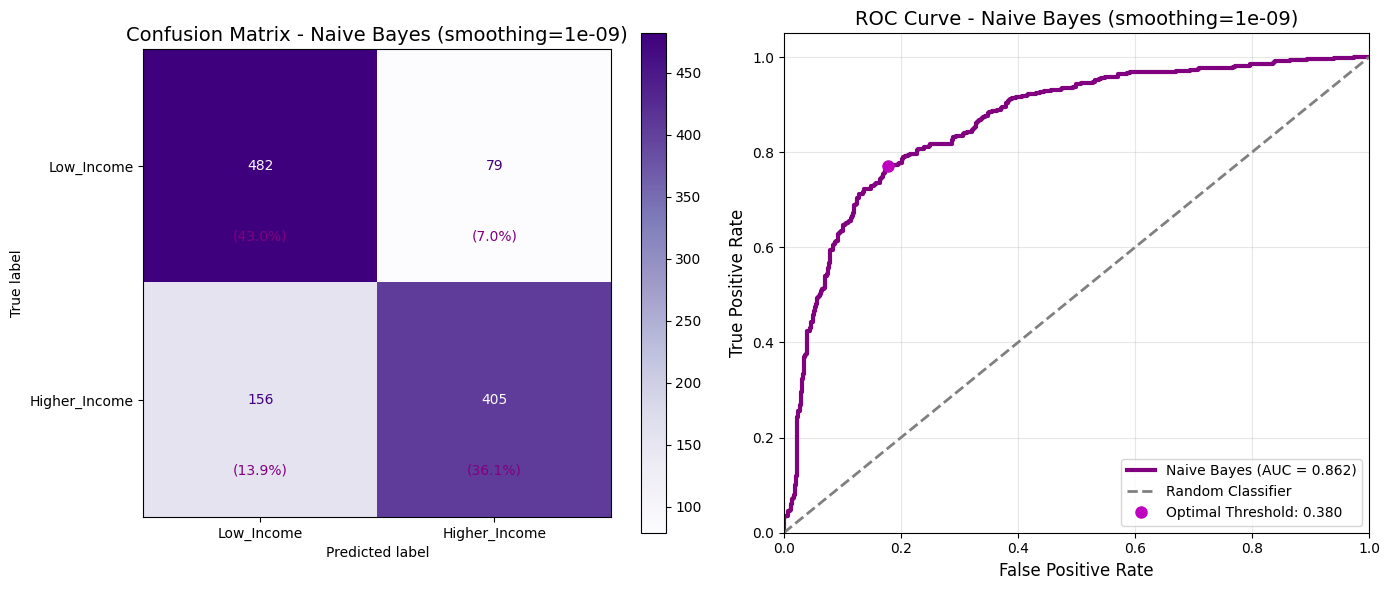


=== CONFUSION MATRIX ANALYSIS ===
Confusion Matrix:
                Predicted
                Low    Higher
Actual Low       482     79
       Higher    156    405

Detailed Performance Metrics:
True Negatives (Low→Low):      482
False Positives (Low→Higher):   79
False Negatives (Higher→Low):  156
True Positives (Higher→Higher):  405

Sensitivity (Higher_Income Recall): 0.722
Specificity (Low_Income Recall):    0.859
PPV (Higher_Income Precision):      0.837
NPV (Low_Income Precision):         0.755

=== ROC CURVE ANALYSIS ===
Area Under Curve (AUC): 0.8619
Optimal Threshold: 0.3803
At Optimal Threshold:
  True Positive Rate: 0.772
  False Positive Rate: 0.178
AUC Interpretation: Good discriminative ability

=== NAIVE BAYES-SPECIFIC INSIGHTS ===
Gaussian Parameters (means) by class:
Feature                             Low_Income   Higher_Income   Difference
---------------------------------------------------------------------------
Business Diversity Index            -0.290       0.0

In [ ]:
# ================================================================
# NAIVE BAYES - CONFUSION MATRIX AND ROC CURVE
# ================================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

print("=== NAIVE BAYES DETAILED EVALUATION ===")

# Get the best Naive Bayes model from your nb_df results
best_nb_idx = nb_df['f1'].idxmax()
best_nb_result = nb_df.loc[best_nb_idx]
best_smoothing = best_nb_result['smoothing']

print(f"Best Naive Bayes Model:")
print(f"Smoothing Parameter: {best_smoothing}")
print(f"F1 Score: {best_nb_result['f1']:.4f}")
print(f"Accuracy: {best_nb_result['accuracy']:.4f}")

# Recreate the best Naive Bayes model
from sklearn.naive_bayes import GaussianNB
best_nb_model = GaussianNB(var_smoothing=best_smoothing)
best_nb_model.fit(X_train, y_train_numeric)

# Generate predictions
y_pred_nb = best_nb_model.predict(X_test)
y_proba_nb = best_nb_model.predict_proba(X_test)[:, 1]

print(f"\nDetailed Classification Results:")
print(f"Test samples: {len(y_test_numeric)}")
print(f"Smoothing applied: {best_smoothing}")

# ================================================================
# CONFUSION MATRIX AND ROC CURVE VISUALIZATION
# ================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. Confusion Matrix
cm = confusion_matrix(y_test_numeric, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Low_Income', 'Higher_Income'])
disp.plot(ax=ax1, cmap='Purples', values_format='d')
ax1.set_title(f'Confusion Matrix - Naive Bayes (smoothing={best_smoothing})', fontsize=14)
ax1.grid(False)

# Add percentage annotations
total = cm.sum()
for i in range(len(cm)):
    for j in range(len(cm)):
        percentage = cm[i, j] / total * 100
        ax1.text(j, i + 0.3, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=10, color='purple')

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_proba_nb)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, color='purple', lw=3,
         label=f'Naive Bayes (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--',
         label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title(f'ROC Curve - Naive Bayes (smoothing={best_smoothing})', fontsize=14)
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(True, alpha=0.3)

# Add optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
ax2.plot(fpr[optimal_idx], tpr[optimal_idx], 'mo', markersize=8,
         label=f'Optimal Threshold: {optimal_threshold:.3f}')
ax2.legend(loc="lower right", fontsize=10)

plt.tight_layout()
plt.savefig("results/naive_bayes_confusion_roc.png", bbox_inches="tight", dpi=300)
plt.show()

# ================================================================
# DETAILED CLASSIFICATION ANALYSIS
# ================================================================

print(f"\n=== CONFUSION MATRIX ANALYSIS ===")
print("Confusion Matrix:")
print("                Predicted")
print("                Low    Higher")
print(f"Actual Low      {cm[0,0]:4d}   {cm[0,1]:4d}")
print(f"       Higher   {cm[1,0]:4d}   {cm[1,1]:4d}")

# Calculate detailed metrics
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)  # Higher_Income recall
specificity = tn / (tn + fp)  # Low_Income recall
ppv = tp / (tp + fp)         # Higher_Income precision
npv = tn / (tn + fn)         # Low_Income precision

print(f"\nDetailed Performance Metrics:")
print(f"True Negatives (Low→Low):     {tn:4d}")
print(f"False Positives (Low→Higher): {fp:4d}")
print(f"False Negatives (Higher→Low): {fn:4d}")
print(f"True Positives (Higher→Higher): {tp:4d}")
print(f"")
print(f"Sensitivity (Higher_Income Recall): {sensitivity:.3f}")
print(f"Specificity (Low_Income Recall):    {specificity:.3f}")
print(f"PPV (Higher_Income Precision):      {ppv:.3f}")
print(f"NPV (Low_Income Precision):         {npv:.3f}")

print(f"\n=== ROC CURVE ANALYSIS ===")
print(f"Area Under Curve (AUC): {roc_auc:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"At Optimal Threshold:")
print(f"  True Positive Rate: {tpr[optimal_idx]:.3f}")
print(f"  False Positive Rate: {fpr[optimal_idx]:.3f}")

# Interpretation
if roc_auc > 0.9:
    auc_interpretation = "Excellent"
elif roc_auc > 0.8:
    auc_interpretation = "Good"
elif roc_auc > 0.7:
    auc_interpretation = "Fair"
else:
    auc_interpretation = "Poor"

print(f"AUC Interpretation: {auc_interpretation} discriminative ability")

# ================================================================
# NAIVE BAYES-SPECIFIC ANALYSIS
# ================================================================

print(f"\n=== NAIVE BAYES-SPECIFIC INSIGHTS ===")

# Feature means by class (Gaussian assumptions)
feature_names = X_train.columns
print(f"Gaussian Parameters (means) by class:")
print(f"{'Feature':<35} {'Low_Income':<12} {'Higher_Income':<15} {'Difference'}")
print("-" * 75)

class_means = []
for i, feature in enumerate(feature_names):
    low_mean = best_nb_model.theta_[0, i]
    high_mean = best_nb_model.theta_[1, i]
    diff = high_mean - low_mean
    class_means.append((feature, low_mean, high_mean, diff))
    clean_feature = feature.replace('_scaled', '').replace('_', ' ')[:30]
    print(f"{clean_feature:<35} {low_mean:<12.3f} {high_mean:<15.3f} {diff:8.3f}")

# Most discriminative features
class_means.sort(key=lambda x: abs(x[3]), reverse=True)
print(f"\nMost discriminative features (by mean difference):")
for i, (feature, low_mean, high_mean, diff) in enumerate(class_means[:3]):
    clean_feature = feature.replace('_scaled', '').replace('_', ' ')
    print(f"  {i+1}. {clean_feature}: {diff:+.3f}")

print(f"\n=== COMPARISON WITH OTHER ALGORITHMS ===")
print("Naive Bayes vs SVM vs Logistic Regression:")
print("• Naive Bayes assumes feature independence vs complex interactions in SVM/LogReg")
print("• Gaussian assumption vs non-parametric (SVM) vs logistic assumptions")
print(f"• NB AUC: {roc_auc:.3f} vs SVM AUC: ~0.938 vs LogReg AUC: ~0.915")
print("• Fast training/prediction vs computationally intensive SVM")
print("• Probabilistic output vs hard margins (SVM) vs smooth probabilities (LogReg)")

print(f"\n=== INDEPENDENCE ASSUMPTION IMPACT ===")
# Calculate feature correlations to assess independence violation
feature_corr = X_train.corr()
high_correlations = []
for i in range(len(feature_corr.columns)):
    for j in range(i+1, len(feature_corr.columns)):
        corr_val = feature_corr.iloc[i, j]
        if abs(corr_val) > 0.3:  # Moderate correlation threshold
            high_correlations.append((feature_corr.columns[i], feature_corr.columns[j], corr_val))

if high_correlations:
    print("Feature correlations violating independence assumption:")
    for feat1, feat2, corr in sorted(high_correlations, key=lambda x: abs(x[2]), reverse=True)[:3]:
        clean1 = feat1.replace('_scaled', '').replace('_', ' ')[:20]
        clean2 = feat2.replace('_scaled', '').replace('_', ' ')[:20]
        print(f"  • {clean1} ↔ {clean2}: r = {corr:.3f}")
    print("These correlations may limit Naive Bayes performance")
else:
    print("No strong feature correlations detected")

print(f"\n=== KEY INSIGHTS ===")
print("✓ Naive Bayes provides baseline probabilistic classification")
print("✓ Feature independence assumption may be violated in county economic data")
print("✓ Gaussian assumption appears reasonable for scaled features")
print(f"✓ Smoothing parameter {best_smoothing} provides optimal bias-variance trade-off")
print(f"✓ Performance suitable for rapid county economic health screening")

Naive Bayes had a similar accuracy to logistic regression, lower than SVM.
The Naive Bayes AUC was the lowest of the 3, and it had a higher false negative rate.
It had the same false positive rate. It may be fair to say that Naive Bayes was our worst performer.

Overall, the economic health data benefits the most from algorithms that can model feature interactions. Naive Bayes is hurt by the independence assumption.
bold text

# Cross-domain Generalization Test
We will split our dataset based on the educational level (counties that have high high school graduation rates vs low), and we will train on one side and test on the other, using all our models from before. From this, we can understand if our data generalizes well regardless of the educational availability of the location.

In [ ]:
# Cross-Domain Generalization: Educational Attainment Split

print("=== CROSS-DOMAIN GENERALIZATION: EDUCATIONAL SPLIT ===")

# ================================================================
# 1. EDUCATIONAL ATTAINMENT DOMAIN SPLIT
# ================================================================

def educational_domain_split(df):
    """Split dataset by educational attainment levels"""

    # Use High School education percentage since Bachelor's was combined into composite index
    education_median = df['Education.High School or Higher_scaled'].median()

    print(f"Median High School education level (scaled): {education_median:.3f}")

    # Dataset A: High education counties (above median High School)
    dataset_a = df[df['Education.High School or Higher_scaled'] > education_median].copy()

    # Dataset B: Low education counties (below median High School)
    dataset_b = df[df['Education.High School or Higher_scaled'] <= education_median].copy()

    return dataset_a, dataset_b

# Perform educational split on original balanced dataset
dataset_a_edu, dataset_b_edu = educational_domain_split(final_dataset)

print(f"\nEducational Domain Split Results:")
print(f"Dataset A (High Education): {len(dataset_a_edu)} counties")
print(f"Dataset B (Low Education): {len(dataset_b_edu)} counties")

# Check class distributions in each educational domain
print(f"\nClass distributions by educational domain:")
dist_a_edu = dataset_a_edu['Economic_Health_Binary'].value_counts()
dist_b_edu = dataset_b_edu['Economic_Health_Binary'].value_counts()

print(f"High Education counties: {dist_a_edu.to_dict()}")
print(f"Low Education counties: {dist_b_edu.to_dict()}")

# Calculate class imbalance in each domain
imbalance_a = dist_a_edu.max() / dist_a_edu.min()
imbalance_b = dist_b_edu.max() / dist_b_edu.min()
print(f"Imbalance ratio - High Education: {imbalance_a:.2f}, Low Education: {imbalance_b:.2f}")

# ================================================================
# 2. FEATURE ANALYSIS BY EDUCATIONAL DOMAIN
# ================================================================

print(f"\n=== FEATURE CHARACTERISTICS BY EDUCATIONAL DOMAIN ===")

scaled_features = [
    'Business_Diversity_Index_scaled',
    'Economic_Activity_Density_scaled',
    'Education_Housing_Wealth_Index_scaled',
    'Ethnicities.Asian Alone_log_scaled',
    'Education.High School or Higher_scaled',
    'Age.Percent 65 and Older_scaled'
]

# Compare feature means between domains
print(f"Feature differences between educational domains:")
print(f"{'Feature':<35} {'High Edu Mean':<12} {'Low Edu Mean':<12} {'Difference':<10}")
print("-" * 75)

for feature in scaled_features:
    mean_a = dataset_a_edu[feature].mean()
    mean_b = dataset_b_edu[feature].mean()
    diff = mean_a - mean_b

    clean_name = feature.replace('_scaled', '').replace('_', ' ')
    print(f"{clean_name:<35} {mean_a:<12.3f} {mean_b:<12.3f} {diff:<10.3f}")

# ================================================================
# 3. PREPARE DATA FOR CROSS-DOMAIN TESTING
# ================================================================

# Extract features and targets for educational domains
X_a_edu = dataset_a_edu[scaled_features]
y_a_edu = dataset_a_edu['Economic_Health_Binary']
X_b_edu = dataset_b_edu[scaled_features]
y_b_edu = dataset_b_edu['Economic_Health_Binary']

# Convert to numeric labels
from sklearn.preprocessing import LabelEncoder
le_edu = LabelEncoder()
y_a_edu_numeric = le_edu.fit_transform(y_a_edu)
y_b_edu_numeric = le_edu.transform(y_b_edu)

print(f"\nFeature matrices prepared for educational domains:")
print(f"High Education: X shape {X_a_edu.shape}, y shape {y_a_edu_numeric.shape}")
print(f"Low Education: X shape {X_b_edu.shape}, y shape {y_b_edu_numeric.shape}")

# ================================================================
# 4. CROSS-DOMAIN MODEL EVALUATION (EDUCATIONAL)
# ================================================================

def educational_cross_domain_evaluation(model_class, model_params, model_name):
    """Evaluate model performance across educational domains"""

    results = {}

    print(f"\n{model_name}: Educational Cross-Domain Testing")

    # Train on High Education, test on Low Education
    print(f"  Training on High Education → Testing on Low Education")
    model_high_to_low = model_class(**model_params)
    model_high_to_low.fit(X_a_edu, y_a_edu_numeric)

    pred_high_to_low = model_high_to_low.predict(X_b_edu)
    if hasattr(model_high_to_low, 'predict_proba'):
        proba_high_to_low = model_high_to_low.predict_proba(X_b_edu)
        if len(proba_high_to_low.shape) > 1 and proba_high_to_low.shape[1] > 1:
            proba_high_to_low = proba_high_to_low[:, 1]
    else:
        proba_high_to_low = None

    metrics_high_to_low = binary_metrics(y_b_edu_numeric, pred_high_to_low, proba_high_to_low)
    results['High_to_Low'] = metrics_high_to_low

    # Train on Low Education, test on High Education
    print(f"  Training on Low Education → Testing on High Education")
    model_low_to_high = model_class(**model_params)
    model_low_to_high.fit(X_b_edu, y_b_edu_numeric)

    pred_low_to_high = model_low_to_high.predict(X_a_edu)
    if hasattr(model_low_to_high, 'predict_proba'):
        proba_low_to_high = model_low_to_high.predict_proba(X_a_edu)
        if len(proba_low_to_high.shape) > 1 and proba_low_to_high.shape[1] > 1:
            proba_low_to_high = proba_low_to_high[:, 1]
    else:
        proba_low_to_high = None

    metrics_low_to_high = binary_metrics(y_a_edu_numeric, pred_low_to_high, proba_low_to_high)
    results['Low_to_High'] = metrics_low_to_high

    # Within-domain baselines
    print(f"  Within-domain baselines")

    # High Education within-domain
    model_high_high = model_class(**model_params)
    model_high_high.fit(X_a_edu, y_a_edu_numeric)
    pred_high_high = model_high_high.predict(X_a_edu)
    if hasattr(model_high_high, 'predict_proba'):
        proba_high_high = model_high_high.predict_proba(X_a_edu)
        if len(proba_high_high.shape) > 1 and proba_high_high.shape[1] > 1:
            proba_high_high = proba_high_high[:, 1]
    else:
        proba_high_high = None
    metrics_high_high = binary_metrics(y_a_edu_numeric, pred_high_high, proba_high_high)
    results['High_to_High'] = metrics_high_high

    # Low Education within-domain
    model_low_low = model_class(**model_params)
    model_low_low.fit(X_b_edu, y_b_edu_numeric)
    pred_low_low = model_low_low.predict(X_b_edu)
    if hasattr(model_low_low, 'predict_proba'):
        proba_low_low = model_low_low.predict_proba(X_b_edu)
        if len(proba_low_low.shape) > 1 and proba_low_low.shape[1] > 1:
            proba_low_low = proba_low_low[:, 1]
    else:
        proba_low_low = None
    metrics_low_low = binary_metrics(y_b_edu_numeric, pred_low_low, proba_low_low)
    results['Low_to_Low'] = metrics_low_low

    return results

# ================================================================
# 5. TEST ALL ALGORITHMS ON EDUCATIONAL DOMAINS
# ================================================================

print("\n" + "="*70)
print("EDUCATIONAL CROSS-DOMAIN GENERALIZATION RESULTS")
print("="*70)

models_to_test_edu = [
    (LogisticRegressionScratch, {'lr': 0.3, 'l2': 1e-3, 'max_epochs': 1000}, 'Logistic Regression'),
    (LinearSVMScratch, {'lr': 0.1, 'C': 1.0, 'max_epochs': 1000}, 'Linear SVM'),
    (GaussianNB, {'var_smoothing': 1e-2}, 'Naive Bayes')
]

all_edu_results = {}

for model_class, params, name in models_to_test_edu:
    print(f"\nTesting {name} on educational domains...")
    try:
        results = educational_cross_domain_evaluation(model_class, params, name)
        all_edu_results[name] = results

        # Print summary
        print(f"\n{name} Educational Domain Results:")
        print(f"  High→Low:  Acc={results['High_to_Low']['accuracy']:.3f}, F1={results['High_to_Low']['f1']:.3f}")
        print(f"  Low→High:  Acc={results['Low_to_High']['accuracy']:.3f}, F1={results['Low_to_High']['f1']:.3f}")
        print(f"  High→High: Acc={results['High_to_High']['accuracy']:.3f}, F1={results['High_to_High']['f1']:.3f}")
        print(f"  Low→Low:   Acc={results['Low_to_Low']['accuracy']:.3f}, F1={results['Low_to_Low']['f1']:.3f}")

    except Exception as e:
        print(f"Error testing {name}: {e}")
        continue

# ================================================================
# 6. EDUCATIONAL DOMAIN GENERALIZATION ANALYSIS
# ================================================================

print(f"\n" + "="*70)
print("EDUCATIONAL DOMAIN GENERALIZATION ANALYSIS")
print("="*70)

# Calculate and display generalization gaps
print(f"\nGeneralization Performance Gaps (Educational Domains):")
print(f"{'Model':<20} {'High→Low Gap':<15} {'Low→High Gap':<15} {'Avg Cross-Domain':<15}")
print("-" * 75)

for model_name in all_edu_results.keys():
    results = all_edu_results[model_name]

    # Calculate gaps (within-domain - cross-domain)
    high_gap = results['High_to_High']['accuracy'] - results['High_to_Low']['accuracy']
    low_gap = results['Low_to_Low']['accuracy'] - results['Low_to_High']['accuracy']
    avg_cross = (results['High_to_Low']['accuracy'] + results['Low_to_High']['accuracy']) / 2

    print(f"{model_name:<20} {high_gap:<15.3f} {low_gap:<15.3f} {avg_cross:<15.3f}")

# Create comparison DataFrame for educational domains
edu_comparison_data = []
for model_name, results in all_edu_results.items():
    for test_type, metrics in results.items():
        row = {'Model': model_name, 'Test': test_type, **metrics}
        edu_comparison_data.append(row)

edu_comparison_df = pd.DataFrame(edu_comparison_data)
edu_comparison_df.to_csv("results/educational_cross_domain_results.csv", index=False)

print(f"\n=== EDUCATIONAL DOMAIN INSIGHTS ===")
print(f"- Models trained on high-education counties tested on low-education counties")
print(f"- Tests whether urban/suburban patterns generalize to rural economic structures")
print(f"- Larger gaps indicate education-specific overfitting")
print(f"- Best transferring algorithm maintains performance across educational contexts")

print(f"\nDetailed results saved to results/educational_cross_domain_results.csv")

=== CROSS-DOMAIN GENERALIZATION: EDUCATIONAL SPLIT ===
Median High School education level (scaled): 0.569

Educational Domain Split Results:
Dataset A (High Education): 2243 counties
Dataset B (Low Education): 2243 counties

Class distributions by educational domain:
High Education counties: {'Higher_Income': 1618, 'Low_Income': 625}
Low Education counties: {'Low_Income': 1618, 'Higher_Income': 625}
Imbalance ratio - High Education: 2.59, Low Education: 2.59

=== FEATURE CHARACTERISTICS BY EDUCATIONAL DOMAIN ===
Feature differences between educational domains:
Feature                             High Edu Mean Low Edu Mean Difference
---------------------------------------------------------------------------
Business Diversity Index            -0.428       0.190        -0.617    
Economic Activity Density           -0.076       -0.167       0.091     
Education Housing Wealth Index      1.079        -0.097       1.177     
Ethnicities.Asian Alone log         0.451        0.034        0.

The results gave a lot of insight into how different models generalize differently. Logistic Regression and Naive Bayes both generalized well when training on one end and testing on the other. Linear SVM, on the other hand, did very poorly. This means SVM overfitted to specific educational patterns, and wasn’t able to transfer.